# Final Project Data Programing (MAS 8010)

# Trade Credit Insurance

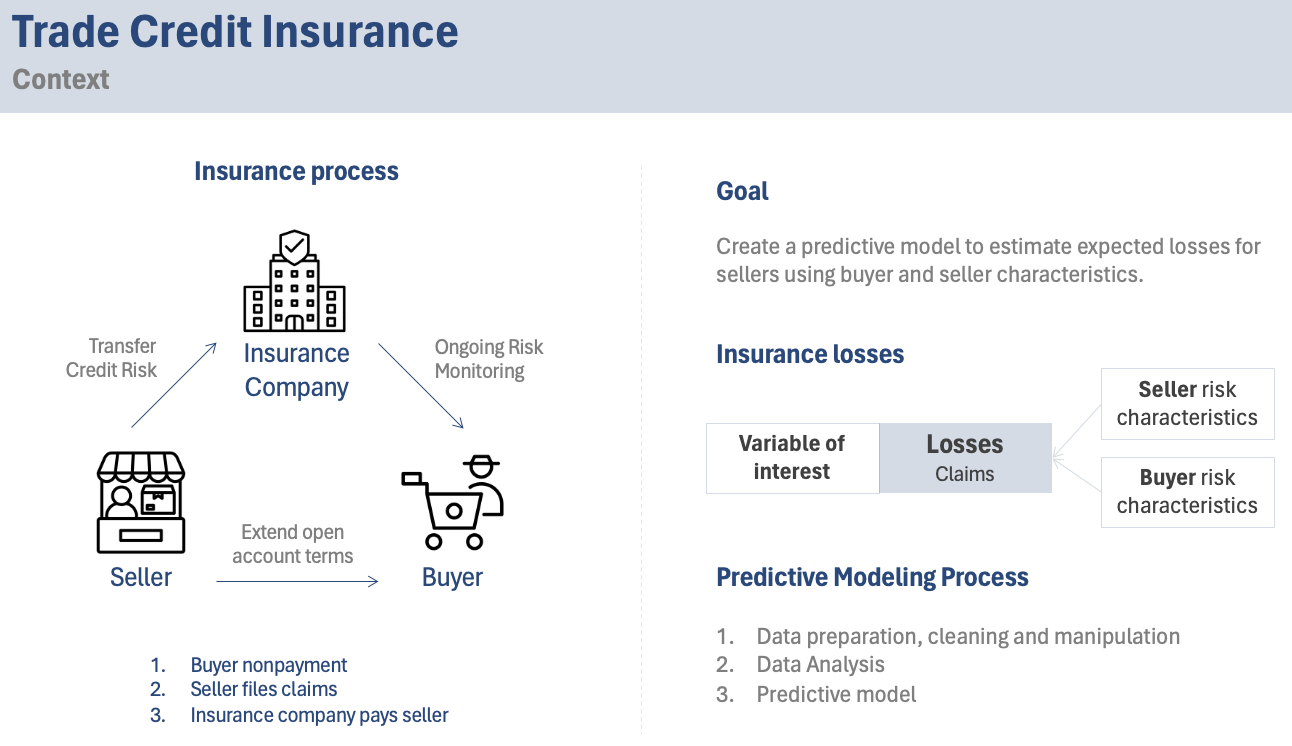

In [1194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Data preparation, cleaning and manipulation

In [1195]:
# Read data for claims, buyer and policy databases

buyer = pd.read_csv('Booked (Buyer).csv', sep=',', skiprows=[0,1])
policy = pd.read_csv('Booked (Policy).csv', sep=',', skiprows=[0,1])
claims = pd.read_excel('Claims.xlsx', skiprows=[0,1])

In [1196]:
# Change column names to make them easier to understand.
# Remove white space and characters.

rename_columns = {'Policy #': 'policy_id',
                  'Policy_type': 'policy_type',
                  'Policy year': 'policy_year',
                  'Buyer #': 'buyer_id',
                  'Amount of coverage_buyer (thousand)': 'coverage_buyer',
                  'Turnover_ratio_buyer': 'turnover_ratio_buyer',
                  'Business_type_buyer': 'business_type_buyer',
                  'Industry_buyer': 'industry_buyer',
                  'Sales_amount_buyer (million)': 'sales_amount',
                  'Seller #': 'seller_id',
                  'Amount of coverage_policy (thousands)': 'coverage_policy',
                  'Turnover_ratio_policy': 'turnover_ratio_policy',
                  'Business_type_Seller': 'business_type_seller',
                  'Industry_Seller': 'industry_seller',
                  'Date of establishment (Seller)': 'date_establishment',
                  'Claim_amount (thousand)': 'claim_amount'}

buyer = buyer.rename(columns=rename_columns)
policy = policy.rename(columns=rename_columns)
claims = claims.rename(columns=rename_columns)

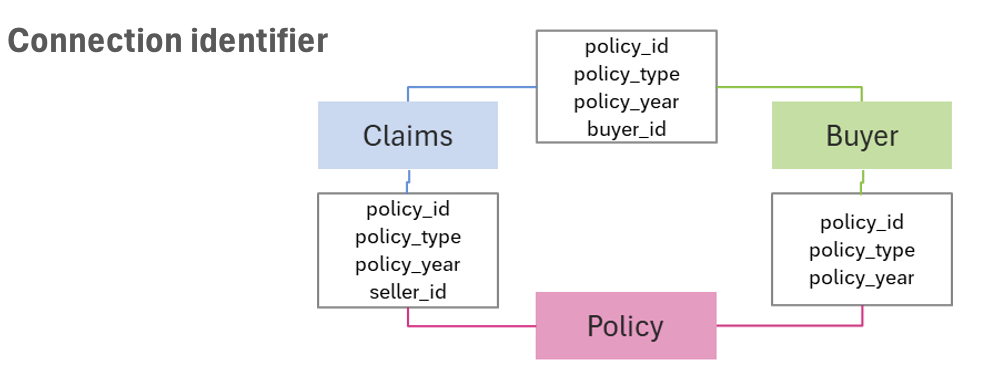

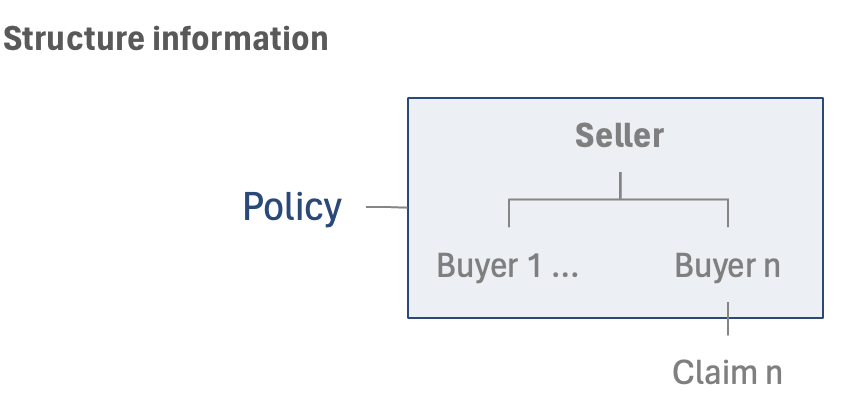

In [1197]:
print('Missing values for Policy: \n')
missing_policy = pd.DataFrame({'Missing%': round(policy.isna().sum() / policy.shape[0] * 100, 2),
                               'Number Missing': policy.isna().sum()})
print(missing_policy)

Missing values for Policy: 

                       Missing%  Number Missing
policy_id                 0.000               0
policy_type               1.790             771
policy_year               0.000               0
seller_id                 0.000               0
coverage_policy           1.790             773
turnover_ratio_policy     1.370             593
business_type_seller      0.000               0
industry_seller           0.000               0
date_establishment        0.000               0


In [1198]:
print('\nMissing values for Buyers: \n')
missing_buyers = pd.DataFrame({'Missing%': round(buyer.isna().sum() / buyer.shape[0] * 100, 2),
                               'Number Missing': buyer.isna().sum()})
print(missing_buyers)


Missing values for Buyers: 

                      Missing%  Number Missing
policy_id                0.000               0
policy_type              0.970             771
policy_year              0.000               0
buyer_id                 0.000               0
coverage_buyer           0.000               0
turnover_ratio_buyer     1.140             907
business_type_buyer      0.000               0
industry_buyer           0.000               0
sales_amount             9.360            7479


In [1199]:
print('\nMissing values for Claims: \n')
missing_claims = pd.DataFrame({'Missing%': round(claims.isna().sum() / claims.shape[0] * 100, 2),
                               'Number Missing': claims.isna().sum()})
print(missing_claims)


Missing values for Claims: 

              Missing%  Number Missing
policy_id        0.000               0
policy_type      1.640              31
policy_year      0.000               0
seller_id        0.000               0
buyer_id         0.000               0
claim_amount     0.000               0


### Policy type imputation
If policy_id count is 1, it's one buyer; if count is more than 1, multiple buyers


In [1200]:
print('Unique values for POLICY - Variable :' , policy['policy_type'].value_counts(), '\n')
print('Unique values for BUYERS - Variable :', buyer['policy_type'].value_counts(), '\n')
print('Unique values for CLAIMS - Variable :', claims['policy_type'].value_counts(), '\n')

Unique values for POLICY - Variable : policy_type
Multiple buyers    23343
One_buyer          18929
###                  127
Name: count, dtype: int64 

Unique values for BUYERS - Variable : policy_type
Multiple buyers    60061
One_buyer          18929
###                  127
Name: count, dtype: int64 

Unique values for CLAIMS - Variable : policy_type
Multiple buyers    1299
One_buyer           537
###                  18
Name: count, dtype: int64 



In [1201]:
na_policy_type = policy.loc[policy['policy_type'].isna(), 'policy_id'].unique().copy()
revise_policy_buyers = []
for i in na_policy_type:
    if buyer.loc[buyer['policy_id'] == i, 'policy_type'].notna().any():
        revise_policy_buyers.append(i)
if len(revise_policy_buyers) > 0:
    print('Alert: There are some policies with Na policy type in the policy df but information in about Policy_type in buyers df')
else:
    print('All NaNs for policy type in Policy df are also NaN in Buyers df')

All NaNs for policy type in Policy df are also NaN in Buyers df


In [1202]:
na_policy_type = policy.loc[policy['policy_type'].isna(), 'policy_id'].unique().copy()
revise_policy_claims = []
for i in na_policy_type:
    if claims.loc[claims['policy_id'] == i, 'policy_type'].notna().any():
        revise_policy_claims.append(i)
if len(revise_policy_claims) > 0:
    print('Alert: There are some policies with NaN policy type in the Policy df but information in about Policy_type in claims df')
else:
    print('All NaNs for policy type in Policy df are also NaN in Claims df')

All NaNs for policy type in Policy df are also NaN in Claims df


In [1203]:
# Imputation policy type for missing values

na_policy_type = policy.loc[policy['policy_type'].isna(), 'policy_id'].unique().copy()
resume = []
for i in na_policy_type:
    n_times = buyer.loc[buyer['policy_id'] == i, :].shape[0]
    resume.append(n_times)
    if n_times == 1:
        policy.loc[policy['policy_id'] == i, 'policy_type'] = 'One_buyer'
        buyer.loc[buyer['policy_id'] == i, 'policy_type'] = 'One_buyer'
        claims.loc[claims['policy_id'] == i, 'policy_type'] = 'One_buyer'
    else:
        policy.loc[policy['policy_id'] == i, 'policy_type'] = 'Multiple buyers'
        buyer.loc[buyer['policy_id'] == i, 'policy_type'] = 'Multiple buyers'
        claims.loc[claims['policy_id'] == i, 'policy_type'] = 'Multiple buyers'
print(pd.Series(resume).value_counts())


1    771
Name: count, dtype: int64


In [1204]:
# Imputation policy type for ### values

na_policy_type = policy.loc[policy['policy_type'] == '###', 'policy_id'].unique().copy()
resume = []
for i in na_policy_type:
    n_times = buyer.loc[buyer['policy_id'] == i, :].shape[0]
    resume.append(n_times)
    if n_times == 1:
        policy.loc[policy['policy_id'] == i, 'policy_type'] = 'One_buyer'
        buyer.loc[buyer['policy_id'] == i, 'policy_type'] = 'One_buyer'
        claims.loc[claims['policy_id'] == i, 'policy_type'] = 'One_buyer'
    else:
        policy.loc[policy['policy_id'] == i, 'policy_type'] = 'Multiple buyers'
        buyer.loc[buyer['policy_id'] == i, 'policy_type'] = 'Multiple buyers'
        claims.loc[claims['policy_id'] == i, 'policy_type'] = 'Multiple buyers'
print(pd.Series(resume).value_counts())

1    127
Name: count, dtype: int64


### Coverage buyer and coverage policy


In [1205]:
# Calculate the coverage buyer when the information of the coverage policy is correct.

cov_buyer_zero = buyer.loc[buyer['coverage_buyer'] == 0, 'policy_id'].unique()
cov_policy_zero_df = policy.loc[policy['policy_id'].isin(cov_buyer_zero), :].groupby(['policy_id']).agg({'coverage_policy':'first'}).reset_index()
cov_buyer_zero_df = buyer.loc[buyer['policy_id'].isin(cov_buyer_zero),].groupby(['policy_id']).agg({'coverage_buyer': 'sum'}).reset_index()
cov_policy_zero_df = cov_policy_zero_df.merge(cov_buyer_zero_df, how='left')
cov_policy_zero_df['difference'] = cov_policy_zero_df['coverage_policy'] - cov_policy_zero_df['coverage_buyer']
print(cov_policy_zero_df)

cov_buyer_zero = cov_buyer_zero[cov_buyer_zero != 23136]
for i in cov_buyer_zero:
    n_zeros = sum(buyer.loc[buyer['policy_id'] == i, 'coverage_buyer'] == 0)
    to_imput = cov_policy_zero_df.loc[cov_policy_zero_df['policy_id'] == i, 'difference'].values[0] / n_zeros
    buyer.loc[buyer['policy_id'] == i, 'coverage_buyer'] = to_imput


   policy_id  coverage_policy  coverage_buyer  difference
0       5752      1795000.000     1765000.000   30000.000
1      15899      1297000.000     1259000.000   38000.000
2      16634      2112000.000     1688000.000  424000.000
3      19414       679000.000      624000.000   55000.000
4      23136       640000.000      642000.000   -2000.000


In [1206]:
# Manipulation: create a new variable for coverage policy named "new_coverage_policy"

coverage_buyer = buyer.groupby(['policy_id']).agg({'coverage_buyer': 'sum'}).reset_index()
coverage_buyer = coverage_buyer.rename(columns={'coverage_buyer': 'new_coverage_policy'})
print(policy.shape)
policy = policy.merge(coverage_buyer, how='left', on='policy_id')

(43170, 9)


### Turnover ratio imputation
### Turnover ratio buyer
Median turnover ratio for buyers in the same business and industry

In [1207]:
turnover_ratio_buyer_na = buyer.loc[buyer['turnover_ratio_buyer'].isna(), 'policy_id'].unique()

target_trb = buyer.groupby(['policy_year', 'business_type_buyer', 'industry_buyer']).agg({'turnover_ratio_buyer': 'median'}).reset_index()

for i in turnover_ratio_buyer_na:
    i_buyer = buyer.loc[buyer['policy_id'] == i, ]
    business = i_buyer['business_type_buyer'].values[0]
    industry = i_buyer['industry_buyer'].values[0]
    year = i_buyer['policy_year'].values[0]
    target = target_trb.loc[(target_trb['policy_year'] == year) & (target_trb['business_type_buyer'] == business) & (target_trb['industry_buyer'] == industry), 'turnover_ratio_buyer']
    target = target.values[0]
    buyer.loc[buyer['policy_id'] == i, 'turnover_ratio_buyer'] = target

### Turnover ratio policy
Weighted average of turnover ratio for buyers based on coverage


In [1208]:
new_coverage_policy = policy.groupby(['policy_id']).agg({'new_coverage_policy': 'first'}).reset_index()
buyer = buyer.merge(new_coverage_policy, how='left', on='policy_id')
buyer.shape
buyer['weight'] = buyer['coverage_buyer'] /  buyer['new_coverage_policy']
buyer['trb_weighted'] = buyer['weight'] *  buyer['turnover_ratio_buyer']

# Manipulation: create a new variable for turnover policy named "new_trb_policy"
new_trb_policy = buyer.groupby(['policy_id']).agg({'trb_weighted':'sum'}).reset_index().rename(columns={'trb_weighted':'new_trb_policy'})
buyer = buyer.merge(new_trb_policy, how='left', on='policy_id')

### Sales amount imputation
Missing sales amount were imputed with coverage buyer 

In [1209]:
df_aux = buyer.loc[buyer['sales_amount'].notna(), ['sales_amount', 'coverage_buyer']].copy()
df_aux['ratio'] = df_aux['coverage_buyer']  / df_aux['sales_amount']
df_aux['ratio'].describe()

count   72409.000
mean          inf
std           NaN
min         0.000
25%         0.610
50%         2.798
75%        11.001
max           inf
Name: ratio, dtype: float64

In [1210]:
buyer['sales_amount'] = buyer['sales_amount'].fillna(buyer['coverage_buyer'] / 2.8)

### Manipulation experience months
Seller's experience months since establishment date

In [1211]:
policy['policy_year'] = pd.to_datetime(policy['policy_year'].astype(str), format='%Y') 
#Change format to datetime, taking from the format of YYYY and converting to YYYY-mm-dd
policy.loc[policy['policy_id'] == 12670, 'date_establishment'] = str('2004-07')
#There is an issue with 12670 being a non-existent date, we will replace with the median for date establishment
policy['date_establishment'] = policy['date_establishment'].astype(str).apply(lambda x: x.replace('-','')).astype(int)
#Removes the hyphen between year and months and changes to int32 data type
policy['date_establishment'].astype('int64') #Changes the data type from int32 to int64
policy['date_establishment'] = pd.to_datetime(policy['date_establishment'].astype(str), format='%Y%m', errors='coerce')
#Changes format from YYYYmm to YYYY-mm-dd
policy['experience_months'] = (policy['policy_year'] - policy['date_establishment'])
policy['experience_months'] = policy['experience_months'].apply(lambda x: round(x.days / 30, 0))

policy_experience_months = policy.groupby(['policy_id']).agg({'experience_months': 'first'}).reset_index()
print('buyer shape before merge: ', buyer.shape)
buyer = buyer.merge(policy_experience_months, how='left', on='policy_id')
print('buyer shape after merge: ', buyer.shape)

buyer['experience_months'] = buyer['experience_months'].astype('int64') #Now we convert experience months to int64
buyer['experience_months'] = buyer['experience_months']+12 #This accounts for claims during the year, bc policy year defaults to 1/1, but claims can be made throughout the year

buyer shape before merge:  (79888, 13)
buyer shape after merge:  (79888, 14)


### Cleaning claim amount when exceeds buyer coverage
Adjusted to coverage buyer for those who exceeded it

In [1212]:
# Claim amount exceeding coverage by policy
claims_amount_policy = claims.groupby(['policy_id']).agg({'claim_amount': 'sum'}).reset_index()
policy_coverage = buyer.groupby(['policy_id']).agg({'new_coverage_policy': 'first'}).reset_index()
claims_amount_policy = claims_amount_policy.merge(policy_coverage, how='left')
claims_amount_policy['difference'] = claims_amount_policy['new_coverage_policy'] - claims_amount_policy['claim_amount']
claims.loc[claims['policy_id'] == 14815, 'claim_amount'] = 8000 # Negative values 
claims.loc[claims['policy_id'] == 1117, 'claim_amount'] = 10000

# Claim amount exceeding coverage inside policy
claims_policy_buyer = claims.groupby(['policy_id', 'buyer_id']).agg({'claim_amount': 'first'}).reset_index()
buyer_policy_buyer = buyer.groupby(['policy_id', 'buyer_id']).agg({'coverage_buyer':'first'}).reset_index()
claims_policy_buyer = claims_policy_buyer.merge(buyer_policy_buyer, how='left')
claims_policy_buyer['difference'] = claims_policy_buyer['claim_amount'] / claims_policy_buyer['coverage_buyer']
claims.loc[claims['policy_id'] == 12491, 'claim_amount'] = 50000


### Manipulation adding new columns

In [1213]:

# Add new column loss percentage 

claims_policy_buyer = claims.groupby(['policy_id', 'buyer_id']).agg({'claim_amount': 'first'}).reset_index()
print('buyer shape before merge: ', buyer.shape)
buyer = buyer.merge(claims_policy_buyer, how='left', on=['policy_id', 'buyer_id'])
print('buyer shape after merge: ', buyer.shape)
buyer['claim_amount'].fillna(0, inplace=True)

buyer['perc_loss'] = buyer['claim_amount'] / buyer['coverage_buyer']

# Add new column claim 

buyer['claim'] = buyer['claim_amount'] != 0
buyer['claim'] = buyer['claim'].astype(int)

# Add new column homogenity industry  

homogenity_industry = buyer.groupby(['policy_id']).agg({'industry_buyer': lambda x: x.unique().shape[0]}).rename(columns={'industry_buyer': 'homogenity_industry'}).reset_index()
print('buyer shape before merge: ', buyer.shape)
buyer = buyer.merge(homogenity_industry, how='left', on=['policy_id'])
print('buyer shape after merge: ', buyer.shape)

# Add new column business_equal and  industry_equal 

policy_business_industry = policy.groupby(['policy_id']).agg({'business_type_seller': 'first', 'industry_seller': 'first'}).reset_index()
print('buyer shape before merge: ', buyer.shape)
buyer = buyer.merge(policy_business_industry, how='left', on=['policy_id'])
print('buyer shape after merge: ', buyer.shape)

buyer['business_equal'] = (buyer['business_type_buyer'] == buyer['business_type_seller']).astype(int)
buyer['industry_equal'] = (buyer['industry_buyer'] == buyer['industry_seller']).astype(int)


buyer shape before merge:  (79888, 14)
buyer shape after merge:  (79888, 15)
buyer shape before merge:  (79888, 17)
buyer shape after merge:  (79888, 18)
buyer shape before merge:  (79888, 18)
buyer shape after merge:  (79888, 20)


### Consolidating into a single database including the new columns

In [1214]:
buyer.drop(columns=['weight', 'trb_weighted'], inplace=True)

id_seller_df = policy.groupby(['policy_id']).agg({'seller_id':'first'}).reset_index()
buyer = buyer.merge(id_seller_df, how='left', on=['policy_id'])

pol_per_seller = buyer.groupby(['seller_id']).agg({'policy_id': lambda x: x.unique().shape[0]}).rename(columns={'policy_id': 'pol_per_seller'})
buyer = buyer.merge(pol_per_seller, how='left', on=['seller_id']) #Policies Per Seller
pol_per_buyer = buyer.groupby(['buyer_id']).agg({'policy_id': lambda x: x.unique().shape[0]}).rename(columns={'policy_id': 'pol_per_buyer'})
buyer = buyer.merge(pol_per_buyer, how='left', on=['buyer_id']) #Policies Per Buyer
buyer_per_pol = buyer.groupby(['policy_id']).agg({'buyer_id': lambda x: x.unique().shape[0]}).rename(columns={'buyer_id': 'buyer_per_pol'})
buyer = buyer.merge(buyer_per_pol, how='left', on=['policy_id']) #Buyers Per Policy
buyer['avg_cov'] = buyer['coverage_buyer'].mean()
# buyer['relative_cov'] = (100* buyer['coverage_buyer'] / buyer['avg_cov'])-100
buyer['relative_cov'] = 100*(buyer['coverage_buyer']-buyer['avg_cov']) / buyer['avg_cov']


buyer.shape
#buyer.to_csv('final_bd.csv', sep=',')

(79888, 26)

In [1215]:
buyer.describe().to_clipboard()

# Data Analysis

## Setting up

First, we will look to set some conditions to allow us to break down the data set into the entire set, the entire multiple buyer set, and the entire multiple buyer claim set. We also set a couple options to make looking into different columns manageable and make the values more presentable.

In [1216]:
claimcond = buyer['claim']>0 #Reduce to only cases where claims were made
buyer[claimcond].groupby(['policy_type']).agg({'claim_amount':'mean', 'perc_loss':'mean'}) #Mean of claims and percent of loss covered for all claims

,claim_amount,perc_loss
policy_type,,
Multiple buyers,75384.656,0.669
One_buyer,51877.976,0.714


In [1217]:
buyer_claims = buyer[claimcond] #Reducing buyer to only claims data in seperate data frame

In [1218]:
mbcond = buyer['policy_type'].isin(['Multiple buyers']) #Reduce buyer to only multiple buyer
buyer_mb = buyer.loc[mbcond] #Create df of only multiple buyers
# buyer_mb
mbclaimcond = buyer_mb['claim']>0
buyer_mbclaims = buyer_mb[mbclaimcond] #df of only mb cases where claims were made
# buyer_mbclaims

In [1219]:
# seller_pol_count = buyer.groupby(['seller_id']).agg({'policy_id':'count'}) #Checking the number of policies for each seller
# buyer_pol_count = buyer.groupby(['buyer_id']).agg({'policy_id':'count'}) #Checking the number of policies for each buyer
pd.set_option('display.float_format','{:.3f}'.format)
pd.set_option('display.max_columns', None)

## Basic Analysis

Here we are running some very basic aggregations that will help us verify later, more complex aggregations. 

First, we would like to find the number of policies per seller, the number of policies per buyer, and the number of unique buyer-seller pairings. Along with these, it may be usefult to know if a pairing has multiple policies together, and if so how many. We find that at maximum, a pairing share 15 policies.

In [1220]:
buyer.groupby(['seller_id']).agg({'policy_id':'count'}).count()

policy_id    20380
dtype: int64

In [1221]:
buyer.groupby(['buyer_id']).agg({'policy_id':'count'}).count()

policy_id    39301
dtype: int64

In [1222]:
buyer.groupby(['seller_id', 'buyer_id']).agg({'policy_id':'count'}).count()

policy_id    69754
dtype: int64

In [1223]:
uniq_counts = buyer.groupby(['seller_id', 'buyer_id']).size().reset_index(name='Pairings')
np.max(uniq_counts['Pairings'])
#Here we are finding the maximum number of pairings between one unique buyer-seller pairing

15

Next, we would like to find some basic summary statistics for the buyer data set, the multiple buyer set, and the multiple buyer claim set.

In [1224]:
buyer.describe() #Summary statistics for buyer df

,policy_id,policy_year,buyer_id,coverage_buyer,turnover_ratio_buyer,sales_amount,new_coverage_policy,new_trb_policy,experience_months,claim_amount,perc_loss,claim,homogenity_industry,business_equal,industry_equal,seller_id,pol_per_seller,pol_per_buyer,buyer_per_pol,avg_cov,relative_cov
count,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79887.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000,79888.000
mean,12842.610,2015.519,3177730.923,71170.714,6.534,335589.066,706656.644,6.533,153.882,1606.313,0.016,0.024,1.773,0.806,0.478,867810.866,2.058,7.405,9.644,71170.714,-0.000
std,8118.942,0.500,1334738.814,115527.779,3.365,2548459.984,776991.922,2.454,97.288,19762.413,0.116,0.152,0.841,0.395,0.500,595646.856,1.966,14.396,9.526,0.000,162.325
min,1.000,2015.000,100000.000,0.000,2.000,0.000,140.000,2.000,2.000,0.000,0.000,0.000,1.000,0.000,0.000,100000.000,1.000,1.000,1.000,71170.714,-100.000
25%,5259.000,2015.000,2404800.000,13000.000,4.060,3571.429,63000.000,4.920,76.000,0.000,0.000,0.000,1.000,1.000,0.000,370200.000,1.000,1.000,2.000,71170.714,-81.734
50%,13714.000,2016.000,3035550.000,30000.000,6.110,10714.286,450000.000,6.237,140.000,0.000,0.000,0.000,2.000,1.000,0.000,714350.000,2.000,2.000,7.000,71170.714,-57.848
75%,19357.000,2016.000,4134525.000,76000.000,8.240,46367.000,1005000.000,7.925,207.000,0.000,0.000,0.000,2.000,1.000,1.000,1300500.000,2.000,7.000,13.000,71170.714,6.785
max,28614.000,2016.000,5847500.000,1000000.000,124.960,135205045.000,4572000.000,64.000,744.000,900000.000,1.000,1.000,5.000,1.000,1.000,2251900.000,21.000,141.000,50.000,71170.714,1305.072


In [1225]:
buyer_mb.describe() #Summary statistics for buyer df reduced to only multiple buyers

,policy_id,policy_year,buyer_id,coverage_buyer,turnover_ratio_buyer,sales_amount,new_coverage_policy,new_trb_policy,experience_months,claim_amount,perc_loss,claim,homogenity_industry,business_equal,industry_equal,seller_id,pol_per_seller,pol_per_buyer,buyer_per_pol,avg_cov,relative_cov
count,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60060.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000,60061.000
mean,12206.648,2015.515,3066324.988,83947.953,6.516,431154.452,929216.929,6.514,165.121,1630.420,0.014,0.022,2.028,0.849,0.462,774914.217,2.037,8.384,12.497,71170.714,17.953
std,7963.719,0.500,1277275.398,121164.649,3.387,2931134.169,775252.625,2.101,97.258,19631.325,0.110,0.145,0.823,0.358,0.499,560304.141,1.765,15.833,9.375,0.000,170.245
min,3.000,2015.000,100300.000,0.000,2.000,0.000,3000.000,2.023,3.000,0.000,0.000,0.000,1.000,0.000,0.000,100200.000,1.000,1.000,1.000,71170.714,-100.000
25%,4585.000,2015.000,2371800.000,24000.000,4.060,3953.000,328000.000,5.123,90.000,0.000,0.000,0.000,1.000,1.000,0.000,322700.000,1.000,1.000,6.000,71170.714,-66.278
50%,13583.000,2016.000,2915100.000,40000.000,6.110,12184.000,707000.000,6.308,154.000,0.000,0.000,0.000,2.000,1.000,0.000,605300.000,2.000,3.000,9.000,71170.714,-43.797
75%,18560.000,2016.000,3892100.000,100000.000,8.230,56596.000,1306000.000,7.623,215.000,0.000,0.000,0.000,3.000,1.000,1.000,1115300.000,2.000,8.000,16.000,71170.714,40.507
max,28611.000,2016.000,5847200.000,1000000.000,124.960,135205045.000,4572000.000,33.116,744.000,900000.000,1.000,1.000,5.000,1.000,1.000,2251700.000,19.000,141.000,50.000,71170.714,1305.072


In [1226]:
buyer_mbclaims.describe() #Summary Statistics for buyer df for multiple buyers where claims were made

,policy_id,policy_year,buyer_id,coverage_buyer,turnover_ratio_buyer,sales_amount,new_coverage_policy,new_trb_policy,experience_months,claim_amount,perc_loss,claim,homogenity_industry,business_equal,industry_equal,seller_id,pol_per_seller,pol_per_buyer,buyer_per_pol,avg_cov,relative_cov
count,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000,1299.000
mean,12287.045,2015.507,2761857.044,111788.299,6.584,26131.004,951444.188,6.458,158.125,75384.656,0.669,1.000,1.909,0.819,0.426,749339.877,2.339,6.187,13.045,71170.714,57.071
std,7877.648,0.500,1457277.687,134997.851,4.208,48795.863,766620.154,2.058,90.446,110761.821,0.343,0.000,0.779,0.385,0.495,536594.093,1.968,7.461,9.242,0.000,189.682
min,21.000,2015.000,108200.000,1000.000,2.000,0.000,22000.000,2.236,12.000,253.440,0.003,1.000,1.000,0.000,0.000,101300.000,1.000,1.000,2.000,71170.714,-98.595
25%,5044.000,2015.000,2285700.000,30000.000,4.070,4930.000,340000.000,5.106,88.000,13147.279,0.345,1.000,1.000,1.000,0.000,324950.000,1.000,1.000,6.000,71170.714,-57.848
50%,13443.000,2016.000,2746900.000,50000.000,6.110,10714.286,779000.000,6.206,147.000,30000.000,0.780,1.000,2.000,1.000,0.000,604400.000,2.000,3.000,10.000,71170.714,-29.746
75%,18684.000,2016.000,3682700.000,133000.000,8.240,26008.500,1336500.000,7.559,207.000,85546.982,1.000,1.000,2.000,1.000,1.000,1012700.000,2.000,7.000,17.000,71170.714,86.875
max,28537.000,2016.000,5842200.000,900000.000,93.330,938064.000,3310000.000,23.347,639.000,900000.000,1.000,1.000,5.000,1.000,1.000,2245500.000,19.000,39.000,49.000,71170.714,1164.565


## Policy dispersion

Now we want to look into some of the main points of the analysis laid out for us. This would be how policies are dispersed among buyers and sellers, as well as how buyers and sellers are distributed among policies. We will put additive focus on the industries and their homogenity. First, we will compare the entire data set, then we will focus on the multiple buyer set to see if there any major changes.

In [1227]:
buyer[['pol_per_seller', 'pol_per_buyer', 'buyer_per_pol', 'homogenity_industry']].describe().rename(columns={'pol_per_seller':'Policies Per Seller', 'buyer_per_pol':'Buyers Per Policy', 'pol_per_buyer':'Policies Per Buyer', 'homogenity_industry':'Homogenity of Industry'})
#These are descriptive statistics for some key items we are looking into for the buyer data set

,Policies Per Seller,Policies Per Buyer,Buyers Per Policy,Homogenity of Industry
count,79888.000,79888.000,79888.000,79888.000
mean,2.058,7.405,9.644,1.773
std,1.966,14.396,9.526,0.841
min,1.000,1.000,1.000,1.000
25%,1.000,1.000,2.000,1.000
50%,2.000,2.000,7.000,2.000
75%,2.000,7.000,13.000,2.000
max,21.000,141.000,50.000,5.000


In [1228]:
buyer_mb[['pol_per_seller', 'pol_per_buyer', 'buyer_per_pol', 'homogenity_industry']].describe().rename(columns={'pol_per_seller':'Policies Per Seller', 'buyer_per_pol':'Buyers Per Policy', 'pol_per_buyer':'Policies Per Buyer', 'homogenity_industry':'Homogenity of Industry'})
#These are the descriptive stats for those same items in the multiple buyer data set

,Policies Per Seller,Policies Per Buyer,Buyers Per Policy,Homogenity of Industry
count,60061.000,60061.000,60061.000,60061.000
mean,2.037,8.384,12.497,2.028
std,1.765,15.833,9.375,0.823
min,1.000,1.000,1.000,1.000
25%,1.000,1.000,6.000,1.000
50%,2.000,3.000,9.000,2.000
75%,2.000,8.000,16.000,3.000
max,19.000,141.000,50.000,5.000


While we have found the entire set and the multiple buyer set, we would also like to compare that multiple buyer policies to the single buyers. To do this we will group them by their policy type.

In [1229]:
buyer.groupby(['policy_type']).agg({'policy_id':'count','pol_per_seller':'mean', 'pol_per_buyer':'mean', 'buyer_per_pol': 'mean', 'homogenity_industry':'mean'}).rename(columns={'policy_id':'Number of Policies','pol_per_seller':'Policies per Seller','pol_per_buyer':'Policies per Buyer','buyer_per_pol':'Buyers per Policy','homogenity_industry':'Homogenity of industry'})
#These are averages for those some columns broken down by number of buyers
#We also verify here that our aggregation is correct by checking with table above for mean on the four statistical columns

,Number of Policies,Policies per Seller,Policies per Buyer,Buyers per Policy,Homogenity of industry
policy_type,,,,,
Multiple buyers,60061,2.037,8.384,12.497,2.028
One_buyer,19827,2.124,4.440,1.000,1.000


Now, we can move into a more specific analysis. We will focus on three main points, the year of claim, the industry of the buyer, and the industry of the seller. We will use these points to evaluate the statistics we just found. The first table will be grouped by the industry of the buyer.

In [1230]:
buyer_mb.groupby(['policy_type','industry_buyer','policy_year']).agg({'policy_id':'count','pol_per_seller':'mean', 'pol_per_buyer':'mean', 'buyer_per_pol': 'mean', 'homogenity_industry':'mean'}).rename(columns={'policy_id':'Number of Policies','pol_per_seller':'Policies per Seller','pol_per_buyer':'Policies per Buyer','buyer_per_pol':'Buyers per Policy','homogenity_industry':'Homogenity of industry'})
#Table of several averages for multiple buyers by industry of the buyer and policy year
#Note that this is only multiple buyer, but all buyers are also included in graphs
#Another important point is that this is for the industry of the buyer

Number of Policies  \
policy_type     industry_buyer                                   policy_year                       
Multiple buyers Agriculture                                      2015                         25   
                                                                 2016                         31   
                Construction                                     2015                       5053   
                                                                 2016                       5414   
                Finance and Insurance                            2015                          1   
                                                                 2016                          1   
                Manufacturing                                    2015                      14739   
                                                                 2016                      15637   
                Other Services                                   2015                        178   
                                                                 2016                        193   
                Professional, Scientific, and Technical Services 2015                        852   
                                                                 2016                        930   
                Transportation                                   2015                        374   
                                                                 2016                        417   
                Utilities                                        2015                         18   
                                                                 2016                         28   
                Wholesale Trade                                  2015                       7915   
                                                                 2016                       8255   

                                                                              Policies per Seller  \
policy_type     industry_buyer                                   policy_year                        
Multiple buyers Agriculture                                      2015                       1.520   
                                                                 2016                       1.742   
                Construction                                     2015                       2.645   
                                                                 2016                       2.676   
                Finance and Insurance                            2015                       2.000   
                                                                 2016                       2.000   
                Manufacturing                                    2015                       1.963   
                                                                 2016                       1.927   
                Other Services                                   2015                       1.567   
                                                                 2016                       1.653   
                Professional, Scientific, and Technical Services 2015                       1.601   
                                                                 2016                       1.590   
                Transportation                                   2015                       1.449   
                                                                 2016                       1.448   
                Utilities                                        2015                       1.944   
                                                                 2016                       1.714   
                Wholesale Trade                                  2015                       1.929   
                                                                 2016                       1.863   

                                                        

To help make the visuals more clean and presentable, we will introduce a list that will allow us to set the order of industries consistently on all visuals. Next, there are three main pieces of information on this graph we would like to visualize: Policies per Seller, Buyers per Policy, and Industry Homogenity. We will have two sets of these visuals, one for industry of buyer and another for industry of seller. For each graph will will seperate for year of claim, and have a side by side comparison of the entire data set and the multiple buyer set.

In [1231]:
ind_order = ['Manufacturing', 'Wholesale Trade', 'Construction', 'Professional, Scientific, and Technical Services', 'Transportation', 'Other Services', 'Agriculture', 'Utilities', 'Finance and Insurance']
#Here we create a list that will allow us to set the order of industries to be used in all industries

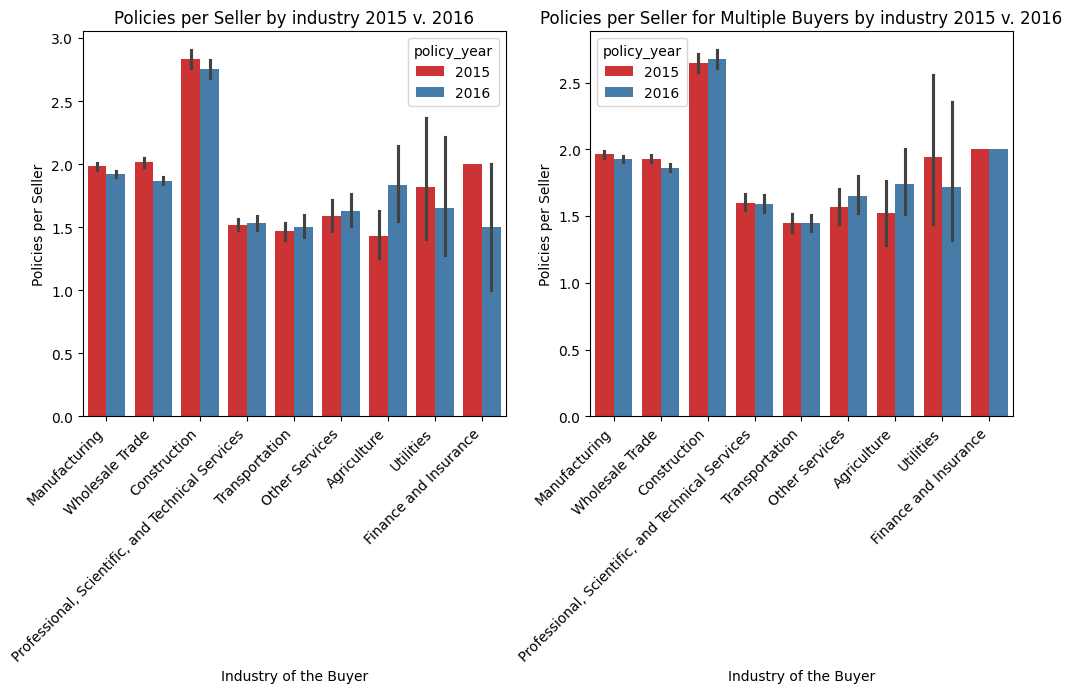

In [1232]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
pps_ind_year = sns.barplot(buyer, x='industry_buyer', y='pol_per_seller', hue='policy_year', palette='Set1', order=ind_order, ax=axes[0])
pps_ind_year.set_xticklabels(pps_ind_year.get_xticklabels(), rotation=45, ha = 'right')
axes[0].set_title('Policies per Seller by industry 2015 v. 2016')
axes[0].set_xlabel('Industry of the Buyer')
axes[0].set_ylabel('Policies per Seller')
pps_ind_yearmb = sns.barplot(buyer_mb, x='industry_buyer', y='pol_per_seller', hue='policy_year', palette='Set1', order=ind_order, ax=axes[1])
pps_ind_yearmb.set_xticklabels(pps_ind_yearmb.get_xticklabels(), rotation=45, ha = 'right')
axes[1].set_title('Policies per Seller for Multiple Buyers by industry 2015 v. 2016')
axes[1].set_xlabel('Industry of the Buyer')
axes[1].set_ylabel('Policies per Seller')
plt.show()
#On the left is the policies per seller for all policies by industry of the buyer, while the right contains only multiple buyer policy data
#We also split them by year to see if there are any major changes over time

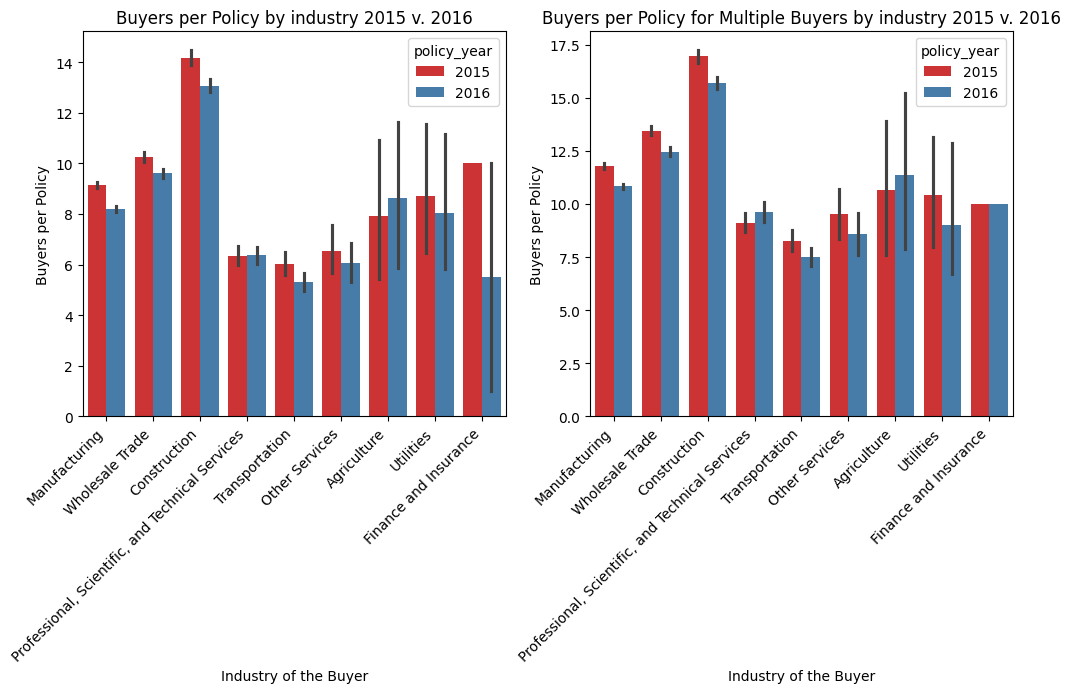

In [1233]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
pps_ind_year = sns.barplot(buyer, x='industry_buyer', y='buyer_per_pol', hue='policy_year', palette='Set1', order=ind_order, ax=axes[0])
pps_ind_year.set_xticklabels(pps_ind_year.get_xticklabels(), rotation=45, ha = 'right')
axes[0].set_title('Buyers per Policy by industry 2015 v. 2016')
axes[0].set_xlabel('Industry of the Buyer')
axes[0].set_ylabel('Buyers per Policy')
pps_ind_yearmb = sns.barplot(buyer_mb, x='industry_buyer', y='buyer_per_pol', hue='policy_year', palette='Set1', order=ind_order, ax=axes[1])
pps_ind_yearmb.set_xticklabels(pps_ind_yearmb.get_xticklabels(), rotation=45, ha = 'right')
axes[1].set_title('Buyers per Policy for Multiple Buyers by industry 2015 v. 2016')
axes[1].set_xlabel('Industry of the Buyer')
axes[1].set_ylabel('Buyers per Policy')
plt.show()
#Now we are looking at the buyers per policy by industry of the buyer, all the other points made in the prior graph hold

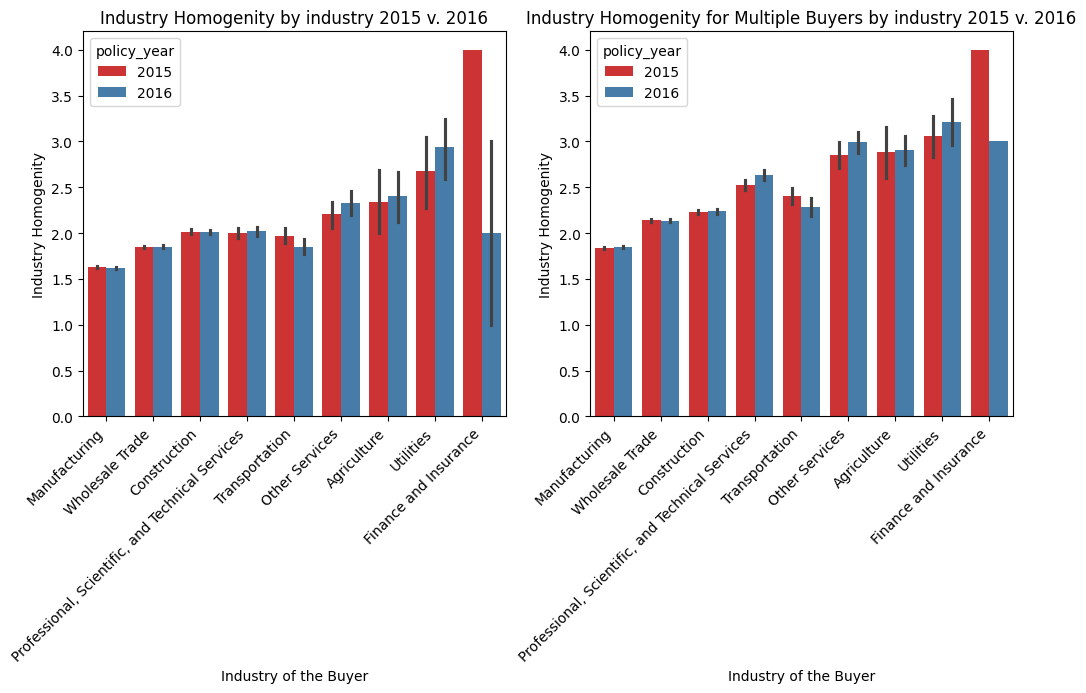

In [1234]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
pps_ind_year = sns.barplot(buyer, x='industry_buyer', y='homogenity_industry', hue='policy_year', palette='Set1', order=ind_order, ax=axes[0])
pps_ind_year.set_xticklabels(pps_ind_year.get_xticklabels(), rotation=45, ha = 'right')
axes[0].set_title('Industry Homogenity by industry 2015 v. 2016')
axes[0].set_xlabel('Industry of the Buyer')
axes[0].set_ylabel('Industry Homogenity')
pps_ind_yearmb = sns.barplot(buyer_mb, x='industry_buyer', y='homogenity_industry', hue='policy_year', palette='Set1', order=ind_order, ax=axes[1])
pps_ind_yearmb.set_xticklabels(pps_ind_yearmb.get_xticklabels(), rotation=45, ha = 'right')
axes[1].set_title('Industry Homogenity for Multiple Buyers by industry 2015 v. 2016')
axes[1].set_xlabel('Industry of the Buyer')
axes[1].set_ylabel('Industry Homogenity')
plt.show()
#Here we have the industry homogenity that we defined represented by industry of the buyer
#Again all other prior points about year and number of buyers hold

Next, we will provide the same table and visuals, but this time we group by the industry of the seller.

In [1235]:
buyer_mb.groupby(['policy_type','industry_seller','policy_year']).agg({'pol_per_seller':'mean', 'pol_per_buyer':'mean', 'buyer_per_pol': 'mean', 'homogenity_industry':'mean'}).rename(columns={'policy_id':'Number of Policies','pol_per_seller':'Average Policies per Seller','pol_per_buyer':'Average Policies per Buyer','buyer_per_pol':'Average Buyers per Policy','homogenity_industry':'Average Homogenity of industry'})
# Several averages for multiple buyers by industry of the seller and policy year
#We want to stress this is the industry of the SELLER now instead of buyer

Average Policies per Seller  \
policy_type     industry_seller                                  policy_year                                
Multiple buyers Agriculture                                      2015                               1.522   
                                                                 2016                               1.545   
                Construction                                     2015                               1.000   
                                                                 2016                               2.000   
                Manufacturing                                    2015                               1.920   
                                                                 2016                               1.892   
                Other Services                                   2015                               1.390   
                                                                 2016                               1.507   
                Professional, Scientific, and Technical Services 2015                               1.480   
                                                                 2016                               1.473   
                Transportation                                   2015                               1.431   
                                                                 2016                               1.402   
                Utilities                                        2015                               1.000   
                                                                 2016                               1.000   
                Wholesale Trade                                  2015                               2.294   
                                                                 2016                               2.247   

                                                                              Average Policies per Buyer  \
policy_type     industry_seller                                  policy_year                               
Multiple buyers Agriculture                                      2015                              6.522   
                                                                 2016                              5.227   
                Construction                                     2015                             55.400   
                                                                 2016                             10.300   
                Manufacturing                                    2015                              8.716   
                                                                 2016                              9.167   
                Other Services                                   2015                             11.815   
                                                                 2016                             13.466   
                Professional, Scientific, and Technical Services 2015                             11.340   
                                                                 2016                              9.837   
                Transportation                                   2015                              9.742   
                                                                 2016                              7.702   
                Utilities                                        2015                              1.222   
                                                                 2016                              1.625   
                Wholesale Trade                                  2015                              7.405   
                                                                 2016                              7.618   

                                                                              Average Buyers per Policy  \
policy_type     industry_seller                                

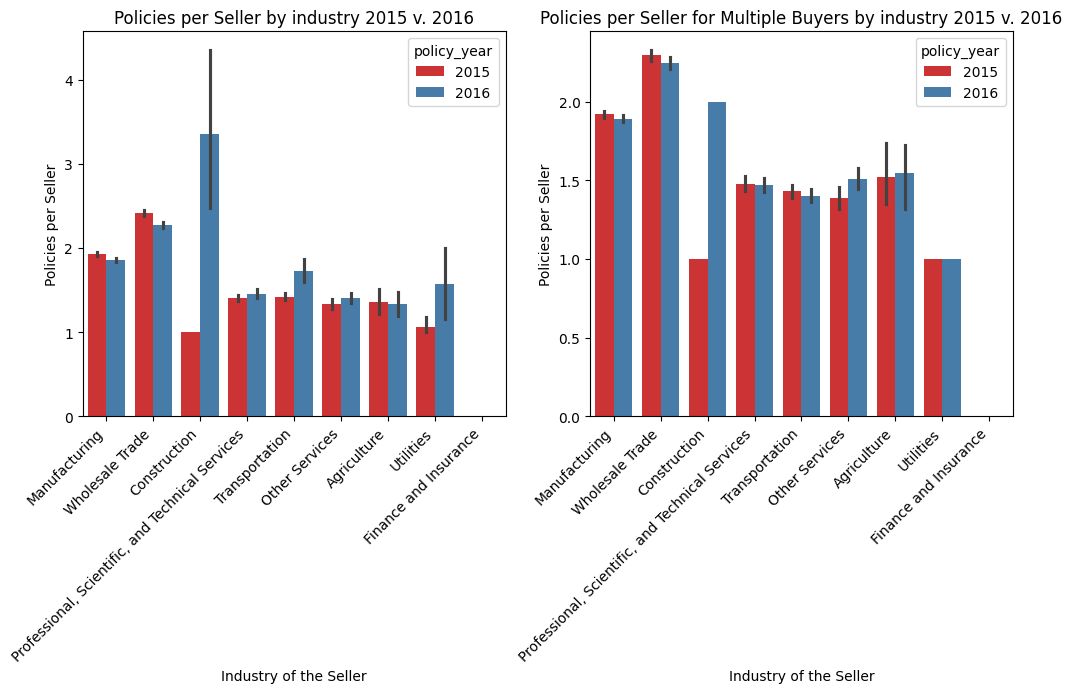

In [1236]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
pps_ind_year = sns.barplot(buyer, x='industry_seller', y='pol_per_seller', hue='policy_year', palette='Set1', order=ind_order, ax=axes[0])
pps_ind_year.set_xticklabels(pps_ind_year.get_xticklabels(), rotation=45, ha = 'right')
axes[0].set_title('Policies per Seller by industry 2015 v. 2016')
axes[0].set_xlabel('Industry of the Seller')
axes[0].set_ylabel('Policies per Seller')
pps_ind_yearmb = sns.barplot(buyer_mb, x='industry_seller', y='pol_per_seller', hue='policy_year', palette='Set1', order=ind_order, ax=axes[1])
pps_ind_yearmb.set_xticklabels(pps_ind_yearmb.get_xticklabels(), rotation=45, ha = 'right')
axes[1].set_title('Policies per Seller for Multiple Buyers by industry 2015 v. 2016')
axes[1].set_xlabel('Industry of the Seller')
axes[1].set_ylabel('Policies per Seller')
plt.show()
#This graph mirrors the first of the prior three graphs, but using industry of the seller instead

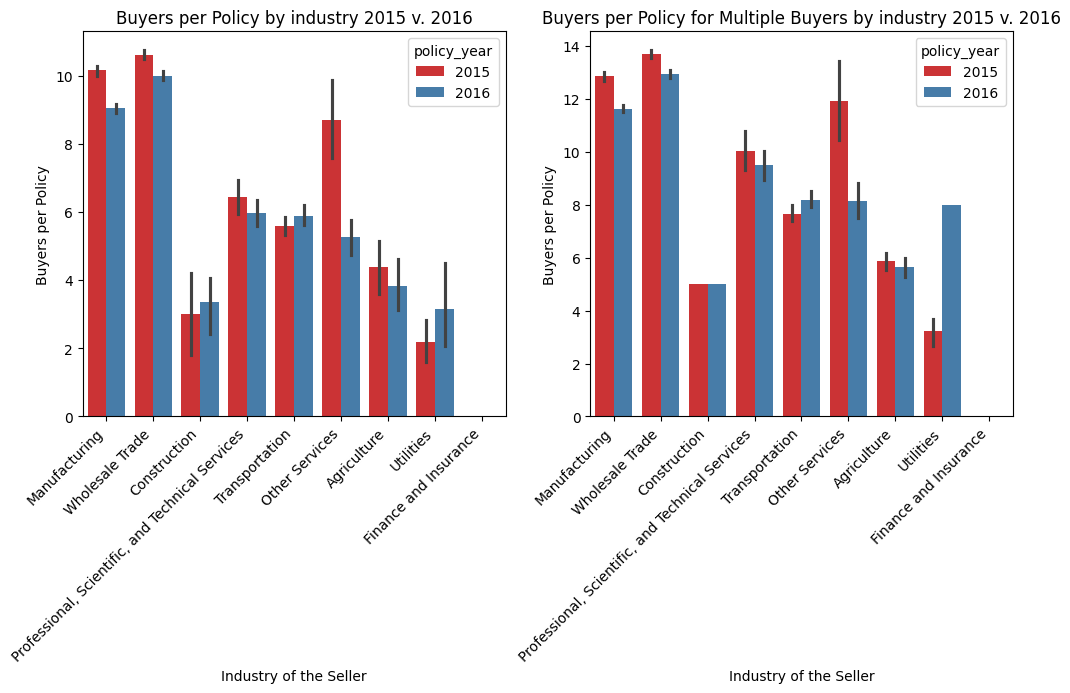

In [1237]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
pps_ind_year = sns.barplot(buyer, x='industry_seller', y='buyer_per_pol', hue='policy_year', palette='Set1', order=ind_order, ax=axes[0])
pps_ind_year.set_xticklabels(pps_ind_year.get_xticklabels(), rotation=45, ha = 'right')
axes[0].set_title('Buyers per Policy by industry 2015 v. 2016')
axes[0].set_xlabel('Industry of the Seller')
axes[0].set_ylabel('Buyers per Policy')
pps_ind_yearmb = sns.barplot(buyer_mb, x='industry_seller', y='buyer_per_pol', hue='policy_year', palette='Set1', order=ind_order, ax=axes[1])
pps_ind_yearmb.set_xticklabels(pps_ind_yearmb.get_xticklabels(), rotation=45, ha = 'right')
axes[1].set_title('Buyers per Policy for Multiple Buyers by industry 2015 v. 2016')
axes[1].set_xlabel('Industry of the Seller')
axes[1].set_ylabel('Buyers per Policy')
plt.show()
#This mirrors the second of the prior three graphs, but again with industry of the seller

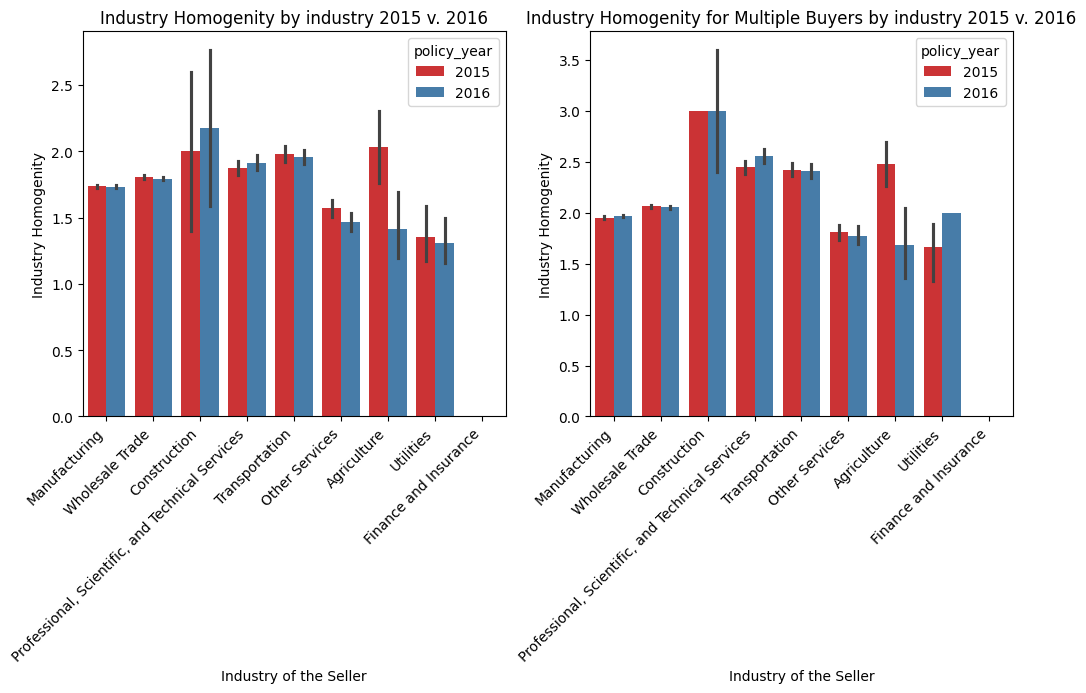

In [1238]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
pps_ind_year = sns.barplot(buyer, x='industry_seller', y='homogenity_industry', hue='policy_year', palette='Set1', order=ind_order, ax=axes[0])
pps_ind_year.set_xticklabels(pps_ind_year.get_xticklabels(), rotation=45, ha = 'right')
axes[0].set_title('Industry Homogenity by industry 2015 v. 2016')
axes[0].set_xlabel('Industry of the Seller')
axes[0].set_ylabel('Industry Homogenity')
pps_ind_yearmb = sns.barplot(buyer_mb, x='industry_seller', y='homogenity_industry', hue='policy_year', palette='Set1', order=ind_order, ax=axes[1])
pps_ind_yearmb.set_xticklabels(pps_ind_yearmb.get_xticklabels(), rotation=45, ha = 'right')
axes[1].set_title('Industry Homogenity for Multiple Buyers by industry 2015 v. 2016')
axes[1].set_xlabel('Industry of the Seller')
axes[1].set_ylabel('Industry Homogenity')
plt.show()
#Again this mirrors the final of those three but using industry of the seller

## Claim Analysis

Now, we would like to look at the claim data specifically. Considering this like the amount of claim coverage and how those claims compared to their coverage. We will then analyze the trends of the claim coverage by the year and industries.

In [1239]:
buyer_mbclaims.groupby(['policy_type','industry_buyer', 'policy_year']).agg({'claim':'count','coverage_buyer':'mean','claim_amount':'mean','perc_loss':'mean'}).rename(columns={'claim':'Total Number of Claims','coverage_buyer':'Average Amount of Coverage','claim_amount':'Average Claim Amount','perc_loss':'Average Percentage of Loss Covered'})
#These are the averages of claim amount, sales amount, and percentage of loss covered by industry of BUYER for multiple buyers

Total Number of Claims  \
policy_type     industry_buyer                                   policy_year                           
Multiple buyers Construction                                     2015                            143   
                                                                 2016                            156   
                Manufacturing                                    2015                            353   
                                                                 2016                            339   
                Other Services                                   2016                              1   
                Professional, Scientific, and Technical Services 2015                              2   
                                                                 2016                              4   
                Transportation                                   2015                              3   
                                                                 2016                              3   
                Utilities                                        2016                              1   
                Wholesale Trade                                  2015                            140   
                                                                 2016                            154   

                                                                              Average Amount of Coverage  \
policy_type     industry_buyer                                   policy_year                               
Multiple buyers Construction                                     2015                          54349.650   
                                                                 2016                          46858.974   
                Manufacturing                                    2015                         143283.286   
                                                                 2016                         133029.499   
                Other Services                                   2016                          23000.000   
                Professional, Scientific, and Technical Services 2015                          84000.000   
                                                                 2016                          65000.000   
                Transportation                                   2015                         180666.667   
                                                                 2016                          47000.000   
                Utilities                                        2016                          30000.000   
                Wholesale Trade                                  2015                         103250.000   
                                                                 2016                         122311.688   

                                                                              Average Claim Amount  \
policy_type     industry_buyer                                   policy_year                         
Multiple buyers Construction                                     2015                    34835.430   
                                                                 2016                    29340.702   
                Manufacturing                                    2015                    92306.639   
                                                                 2016                    88084.060   
                Other Services                                   2016                    23000.000   
                Professional, Scientific, and Technical Services 2015                    81072.720   
                                                                 2016                    41007.720   
                Transportation                                   2015                    81805.780   
                                                                 2016                   

In [1240]:
buyer_mbclaims.groupby(['policy_type','industry_seller', 'policy_year']).agg({'claim':'count','sales_amount':'mean','claim_amount':'mean','coverage_buyer':'mean','perc_loss':'mean'}).rename(columns={'claim':'Total Number of Claims','sales_amount':'Average Sales Amount','claim_amount':'Average Claim Amount','coverage_buyer':'Average Buyer Coverage','perc_loss':'Average Percentage of Loss Covered'})
#These are the averages of claim amount, sales amount, and percentage of loss covered by industry of SELLER for multiple buyers

Total Number of Claims  \
policy_type     industry_seller                                  policy_year                           
Multiple buyers Agriculture                                      2015                              1   
                Manufacturing                                    2015                            293   
                                                                 2016                            282   
                Other Services                                   2015                             11   
                                                                 2016                              5   
                Professional, Scientific, and Technical Services 2015                              2   
                                                                 2016                              4   
                Transportation                                   2015                              5   
                                                                 2016                             10   
                Wholesale Trade                                  2015                            329   
                                                                 2016                            357   

                                                                              Average Sales Amount  \
policy_type     industry_seller                                  policy_year                         
Multiple buyers Agriculture                                      2015                    51834.000   
                Manufacturing                                    2015                    34440.172   
                                                                 2016                    25324.687   
                Other Services                                   2015                    32004.208   
                                                                 2016                    64939.400   
                Professional, Scientific, and Technical Services 2015                    15721.500   
                                                                 2016                    30729.464   
                Transportation                                   2015                    44185.400   
                                                                 2016                    42221.800   
                Wholesale Trade                                  2015                    23646.459   
                                                                 2016                    20744.744   

                                                                              Average Claim Amount  \
policy_type     industry_seller                                  policy_year                         
Multiple buyers Agriculture                                      2015                   400000.000   
                Manufacturing                                    2015                    84815.158   
                                                                 2016                    74149.171   
                Other Services                                   2015                    17091.191   
                                                                 2016                    51309.978   
                Professional, Scientific, and Technical Services 2015                    46120.000   
                                                                 2016                    26539.000   
                Transportation                                   2015                   136524.394   
                                                                 2016                    29013.750   
                Wholesale Trade                                  2015                    68444.746   
                                                                 2016                    77394.203   

                                                                       

The first linear regression line will represent the entire data set. Due to the density of non-claim policies, we do not believe this to be an especially useful representation of the data. Instead we will break it down to the multiple buyer claim data, then group the data by year and industry respectively.

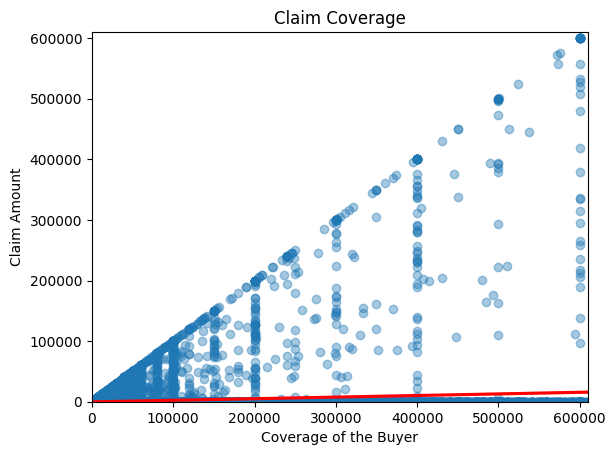

In [1241]:
sns.regplot(buyer, x='coverage_buyer', y='claim_amount', scatter_kws={'alpha':0.4}, line_kws={'alpha':1, 'color':'red'}).set(xlim=(0,610000),ylim=(0,610000),xlabel='Coverage of the Buyer',ylabel='Claim Amount',title='Claim Coverage')
plt.show()
#This is the line of regression for the entire buyer data set
#We believe breaking this down by only the claims will help get a better assessment of the claim coverage

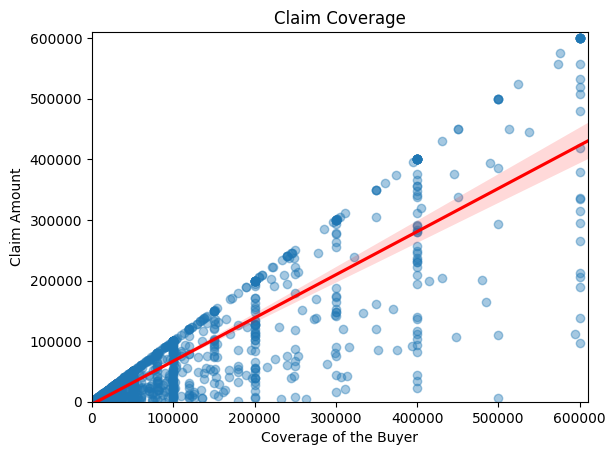

In [1242]:
sns.regplot(buyer_mbclaims, x='coverage_buyer', y='claim_amount', scatter_kws={'alpha':0.4}, line_kws={'alpha':1, 'color':'red'}).set(xlim=(0,610000),ylim=(0,610000),xlabel='Coverage of the Buyer',ylabel='Claim Amount',title='Claim Coverage')
plt.show()
#Here is the line of regression for buyer df of multiple buyers where claims were made

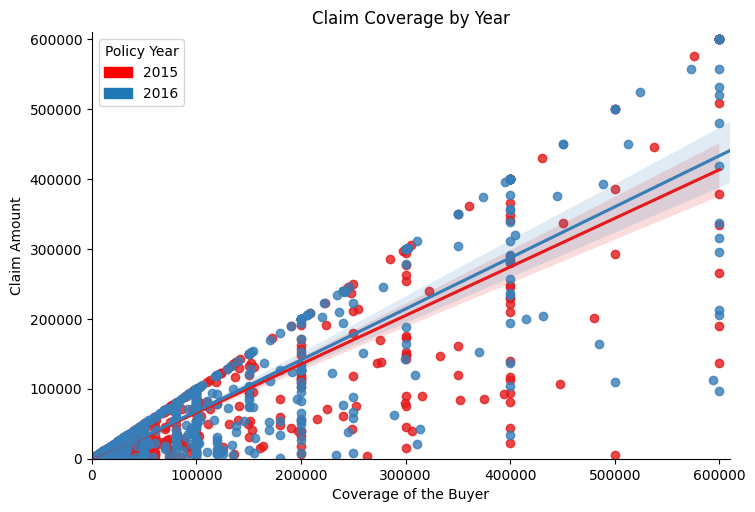

In [1243]:
sns.lmplot(buyer_mbclaims, x='coverage_buyer', y='claim_amount', hue='policy_year', palette='Set1', aspect=1.5, legend=False).set(xlim=(0,610000),ylim=(0,610000),xlabel='Coverage of the Buyer',ylabel='Claim Amount',title='Claim Coverage by Year')
#Lines of regression for each year on buyer df for mult buyers where claims were made
plt.legend(loc=0, title='Policy Year', labels = ['2015','2016'], handles=[mpatches.Patch(color='r'), mpatches.Patch(color='C0')])
plt.show()
#Similar to the graphs we break this down further to the year of the claim

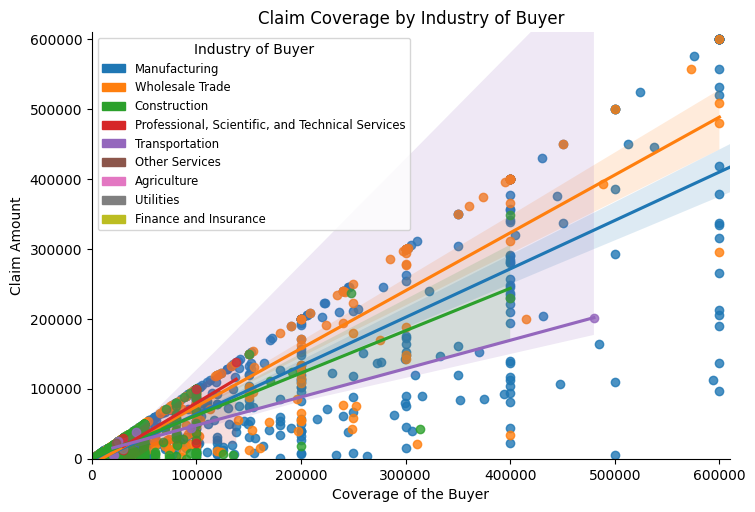

In [1244]:
sns.lmplot(buyer_mbclaims, x='coverage_buyer', y='claim_amount', hue='industry_buyer',hue_order=ind_order, aspect=1.5, legend=False).set(xlim=(0,610000),ylim=(0,610000),xlabel='Coverage of the Buyer',ylabel='Claim Amount',title='Claim Coverage by Industry of Buyer')
#Lines of regression for each year on buyer df for mult buyers where claims were made
plt.legend(loc=0, title='Industry of Buyer', labels = ind_order, handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='C1'),mpatches.Patch(color='C2'),mpatches.Patch(color='C3'),mpatches.Patch(color='C4'),mpatches.Patch(color='C5'),mpatches.Patch(color='C6'),mpatches.Patch(color='C7'),mpatches.Patch(color='C8')], fontsize='small')
plt.show()
#Again similar to the graphs, we would like to look at this in respect to the industry of the buyer

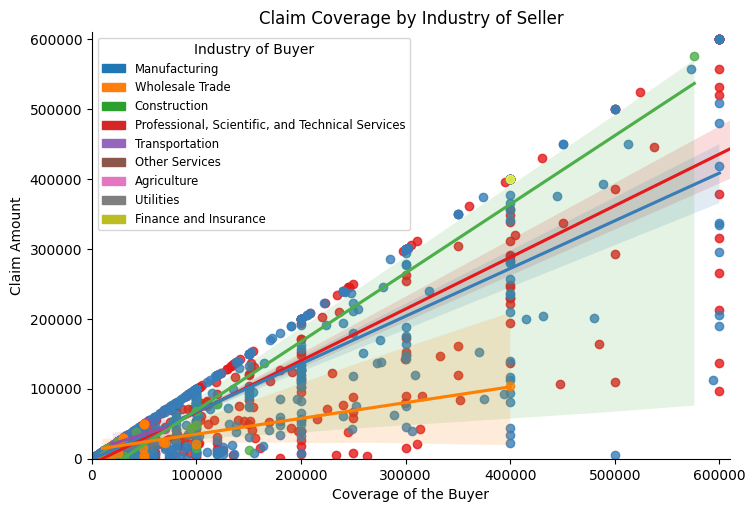

In [1245]:
sns.lmplot(buyer_mbclaims, x='coverage_buyer', y='claim_amount', hue='industry_seller', palette='Set1', aspect=1.5, legend=False).set(xlim=(0,610000),ylim=(0,610000),xlabel='Coverage of the Buyer',ylabel='Claim Amount',title='Claim Coverage by Industry of Seller')
plt.legend(loc=0, title='Industry of Buyer', labels = ind_order, handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='C1'),mpatches.Patch(color='C2'),mpatches.Patch(color='C3'),mpatches.Patch(color='C4'),mpatches.Patch(color='C5'),mpatches.Patch(color='C6'),mpatches.Patch(color='C7'),mpatches.Patch(color='C8')], fontsize='small')
plt.show()
#These are the regression lines for the coverages by industry of the sellers

## Turnover Analysis

Here, we will take a look at the turnover ratio and its density throughout the data set. Simiilar to the pattern followed so far, we will focus on year and industry. Likewise, we will begin with the entire data set, then move to the multiple buyer claims set. One important change to note, we are analyzing the turnover ratio of the buyer, we will only analyze the industry of the buyer.

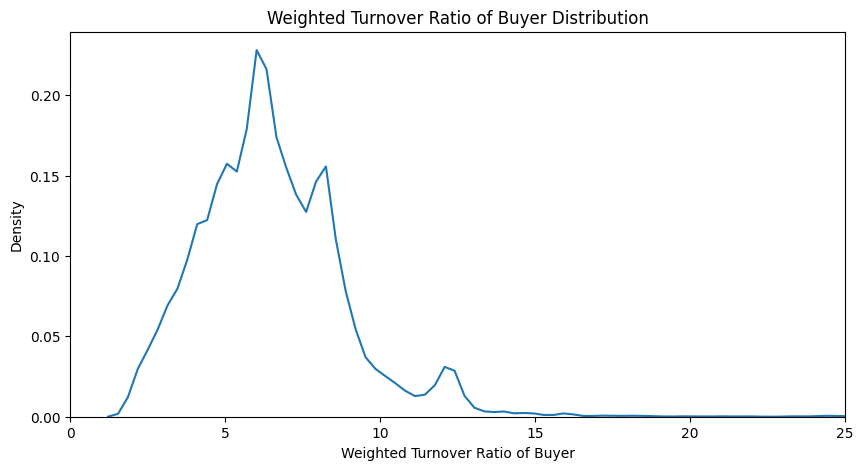

In [1246]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer,x='new_trb_policy').set(xlim=(0,25),xlabel='Weighted Turnover Ratio of Buyer', title='Weighted Turnover Ratio of Buyer Distribution')
plt.show()
#Density plot of the weighted turnover ratio

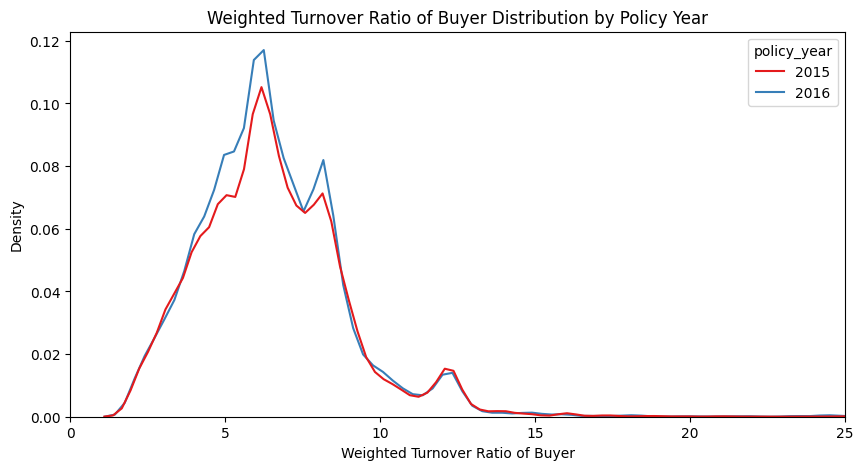

In [1247]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer,x='new_trb_policy', hue='policy_year', palette='Set1').set(xlim=(0,25),xlabel='Weighted Turnover Ratio of Buyer', title='Weighted Turnover Ratio of Buyer Distribution by Policy Year')
plt.show()
#Density plot for weighted turnover ratio by policy year

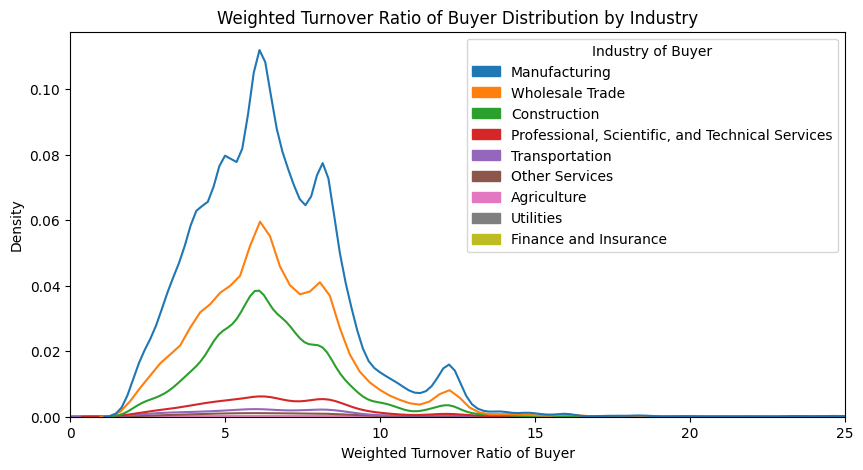

In [1248]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer,x='new_trb_policy', hue='industry_buyer', hue_order=ind_order).set(xlim=(0,25),xlabel='Weighted Turnover Ratio of Buyer', title='Weighted Turnover Ratio of Buyer Distribution by Industry')
plt.legend(loc=0, title='Industry of Buyer', labels = ind_order, handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='C1'),mpatches.Patch(color='C2'),mpatches.Patch(color='C3'),mpatches.Patch(color='C4'),mpatches.Patch(color='C5'),mpatches.Patch(color='C6'),mpatches.Patch(color='C7'),mpatches.Patch(color='C8')])
plt.show()
#Density plot of weighted turnover ratio by industry of the buyer

The following are the multiple buyer claims data set. As we would expect, the line is much more smooth because there are far fewer observations.

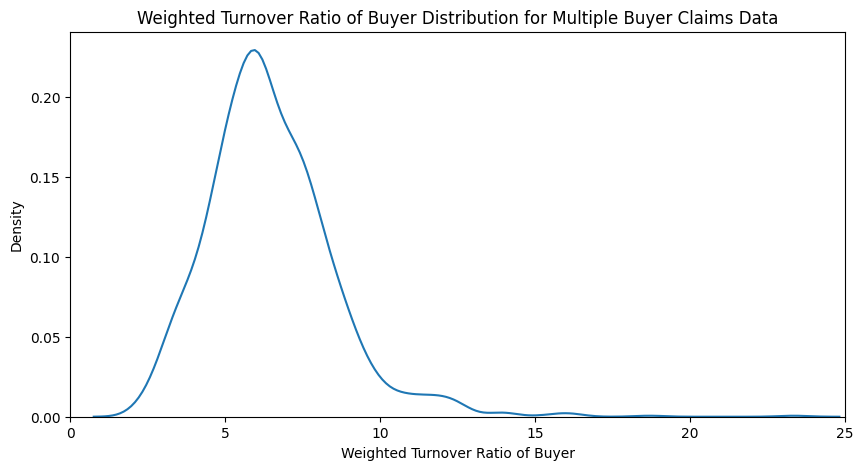

In [1249]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer_mbclaims,x='new_trb_policy').set(xlim=(0,25),xlabel='Weighted Turnover Ratio of Buyer', title='Weighted Turnover Ratio of Buyer Distribution for Multiple Buyer Claims Data')
plt.show()
#Density of weighted turnover ratio for multiple buyer claim data

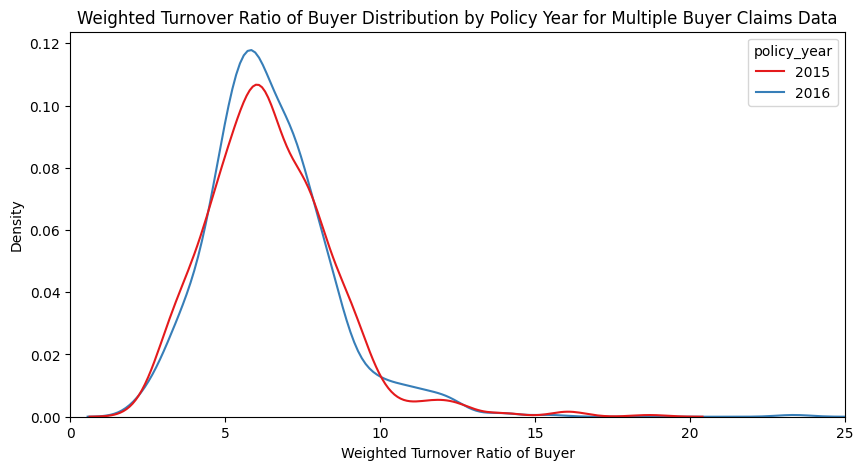

In [1250]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer_mbclaims,x='new_trb_policy', hue='policy_year', palette='Set1').set(xlim=(0,25),xlabel='Weighted Turnover Ratio of Buyer', title='Weighted Turnover Ratio of Buyer Distribution by Policy Year for Multiple Buyer Claims Data')
plt.show()
#Density of weighted turnover ratio for multiple buyer claim data by policy year

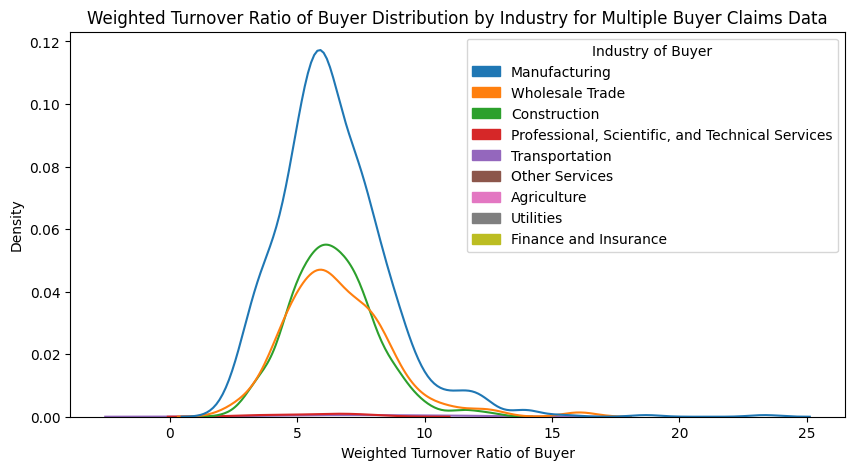

In [1251]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer_mbclaims,x='new_trb_policy', hue='industry_buyer', hue_order=ind_order).set(xlabel='Weighted Turnover Ratio of Buyer', title='Weighted Turnover Ratio of Buyer Distribution by Industry for Multiple Buyer Claims Data')
plt.legend(loc=0, title='Industry of Buyer', labels = ind_order, handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='C1'),mpatches.Patch(color='C2'),mpatches.Patch(color='C3'),mpatches.Patch(color='C4'),mpatches.Patch(color='C5'),mpatches.Patch(color='C6'),mpatches.Patch(color='C7'),mpatches.Patch(color='C8')])
plt.show()
#Density of weighted turnover ratio for multiple buyer claim data by industry of buyer

## Establishment Length Analysis

Next, we would like to return to an item we create early in the notebook, that is experience_months, where we are looking at the number of months after establishment before the policy year. We would like to compare the enitre set to the claims set, and believe there should be a similar trend and there is. Again we will compare by year, industry of buyer, and industry of seller.

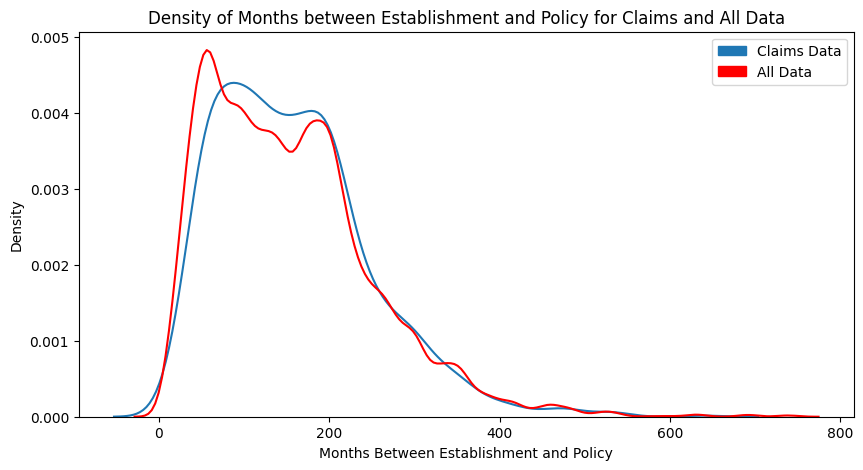

In [1252]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer_mbclaims, x='experience_months').set(xlabel='Months Between Establishment and Policy', title='Density of Months between Establishment and Policy for Claims and All Data')
sns.kdeplot(buyer, x='experience_months', color='r')
plt.legend(loc=0, labels=['Claims Data','All Data'], handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='r')])
plt.show()
#experience_months density plot for all data and multiple buyer claim data

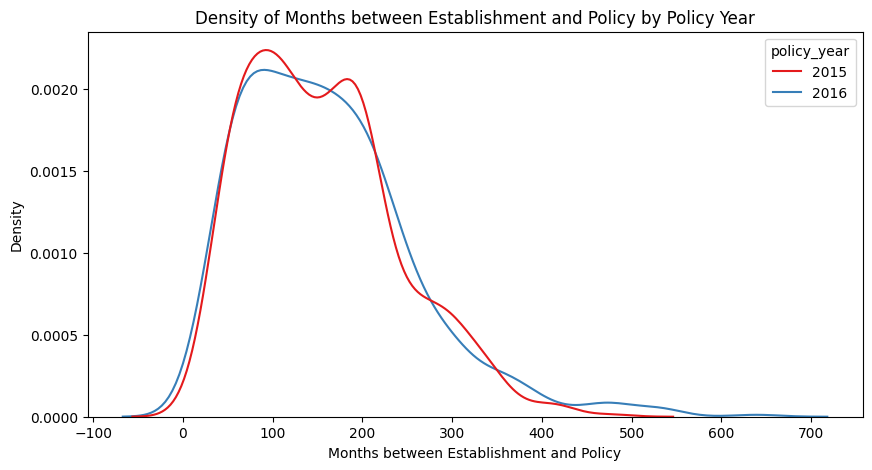

In [1253]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer_mbclaims, x='experience_months', hue='policy_year', palette='Set1').set(xlabel='Months between Establishment and Policy', title='Density of Months between Establishment and Policy by Policy Year')
plt.show()
#experience_months density plot for multiple buyer claims data by year

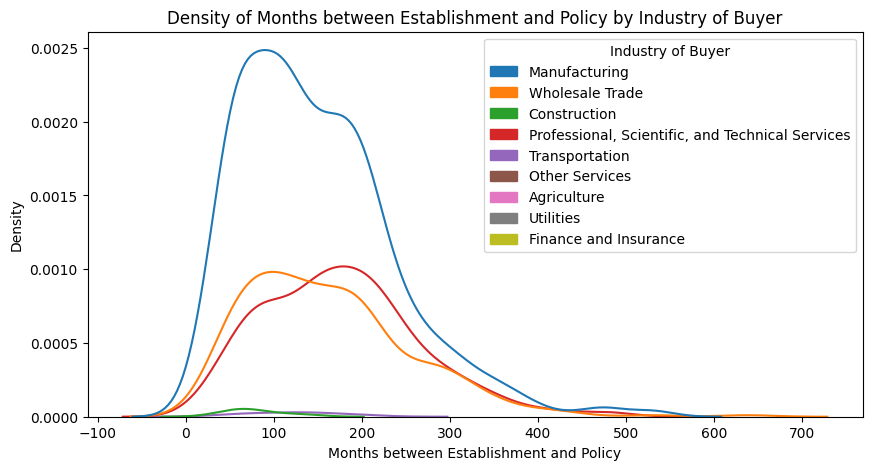

In [1254]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer_mbclaims, x='experience_months', hue='industry_buyer').set(xlabel='Months between Establishment and Policy', title='Density of Months between Establishment and Policy by Industry of Buyer')
plt.legend(loc=0, title='Industry of Buyer', labels = ind_order, handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='C1'),mpatches.Patch(color='C2'),mpatches.Patch(color='C3'),mpatches.Patch(color='C4'),mpatches.Patch(color='C5'),mpatches.Patch(color='C6'),mpatches.Patch(color='C7'),mpatches.Patch(color='C8')])
plt.show()
#experience_months density plot for multiple buyer claims data by industry of buyer

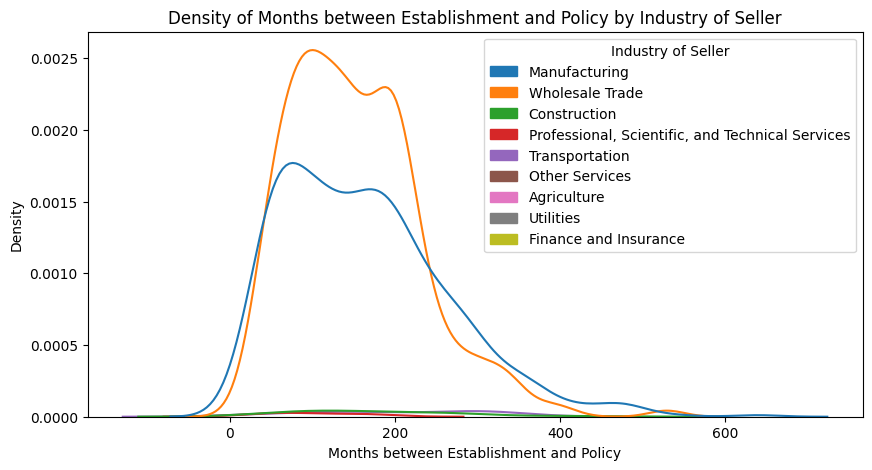

In [1255]:
fig, axes = plt.subplots(figsize=(10,5))
sns.kdeplot(buyer_mbclaims, x='experience_months', hue='industry_seller').set(xlabel='Months between Establishment and Policy', title='Density of Months between Establishment and Policy by Industry of Seller')
plt.legend(loc=0, title='Industry of Seller', labels = ind_order, handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='C1'),mpatches.Patch(color='C2'),mpatches.Patch(color='C3'),mpatches.Patch(color='C4'),mpatches.Patch(color='C5'),mpatches.Patch(color='C6'),mpatches.Patch(color='C7'),mpatches.Patch(color='C8')])
plt.show()
#experience_months density plot for multiple buyer claims data by year by industry of seller

Now we will look at the distribution of both claim amount and months between establishment and policy year. Then, we will follow this with the relative coverage for the seller. That is the amount of average coverage on average of experience_months based on the density of each point in experience months. Very important note, that though the line is mostly above the average line, the points below are much more densely populated and the points above are lightly populated, which causes the average line to look out of place.

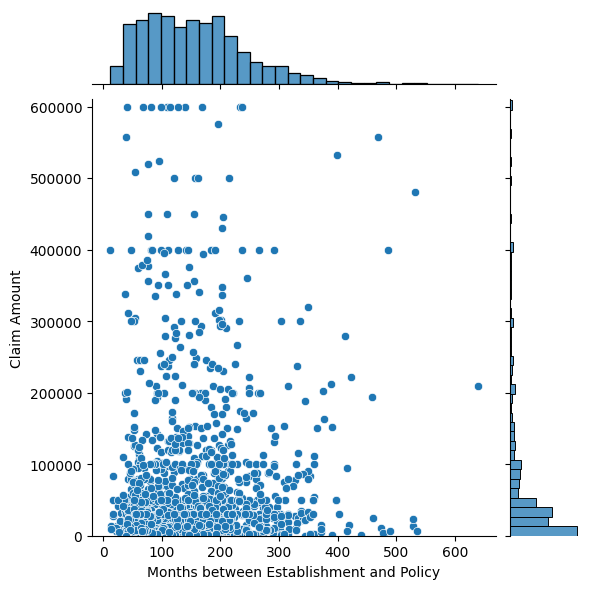

In [1256]:
sns.jointplot(buyer_mbclaims, x='experience_months', y='claim_amount', ylim=(0,610000)).set_axis_labels('Months between Establishment and Policy', 'Claim Amount')
plt.show()
#Joint plot for densities of experience_months and claim amount

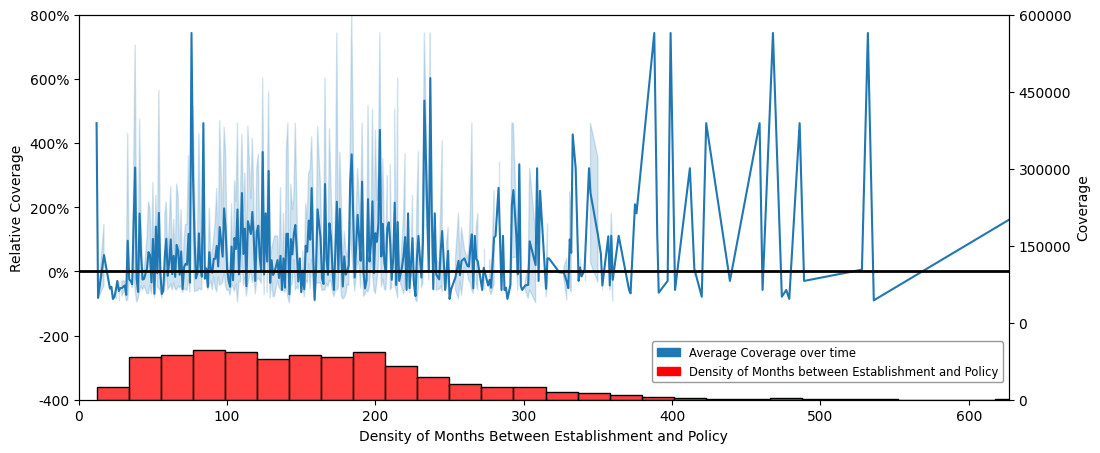

In [1257]:
axes.unicode_minus:False
fig, ax1 = plt.subplots(figsize=(12,5))
sns.lineplot(buyer_mbclaims, x='experience_months', y='relative_cov').set(ylim=(-400,800),xlabel = 'Density of Months Between Establishment and Policy', ylabel='Relative Coverage', yticklabels=['-400','-200','0%','200%','400%','600%','800%'])
plt.plot([0,627],[0,0],linewidth=2, color='black')
ax2 = ax1.twinx()
sns.lineplot(buyer_mbclaims, x='experience_months', y='coverage_buyer')
sns.histplot(buyer_mbclaims, x='experience_months', color='r').set(ylim=(0,1000),xlim=(0,627),ylabel='Coverage',yticklabels=[0, 0, 150000, 300000, 450000, 600000])
plt.legend(loc=4, bbox_to_anchor = (1,0.03), labels=['Average Coverage over time', 'Density of Months between Establishment and Policy'], handles=[mpatches.Patch(color='C0'),mpatches.Patch(color='r')], fontsize='small').get_frame().set_edgecolor('grey')
#The bottom in red bins is the density plot of the experience_months
#The blue line is the average coverage over the months betweeen establishment and policy year
#The black line is the average coverage for the set, it can be seen in the next line of code

For clarity sake, I have included the average coverage below to verify that the average (or relative coverage of 0%) is correct.

In [1258]:
buyer_mbclaims.agg({'coverage_buyer':'mean'})
#This is the average coverage represented by the black line above

coverage_buyer   111788.299
dtype: float64

## Distribution of variables

Below are the distribution of variable data through the set, these will be useful for constructing our model.

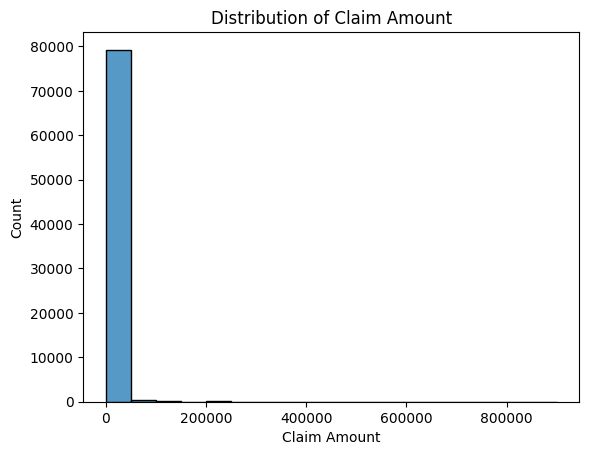

In [1259]:
sns.histplot(buyer, x='claim_amount').set(xlabel='Claim Amount', title='Distribution of Claim Amount')
plt.show()
#Distribution for claim amount for entire set, where the vast majority did not have claims

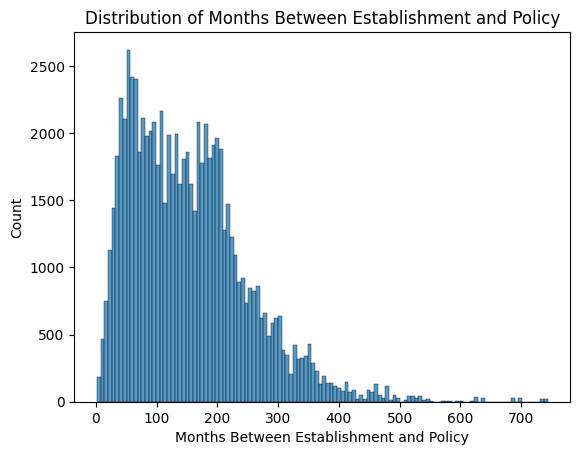

In [1260]:
sns.histplot(buyer, x='experience_months').set(xlabel='Months Between Establishment and Policy', title='Distribution of Months Between Establishment and Policy')
plt.show()
#Distribution of experience_months

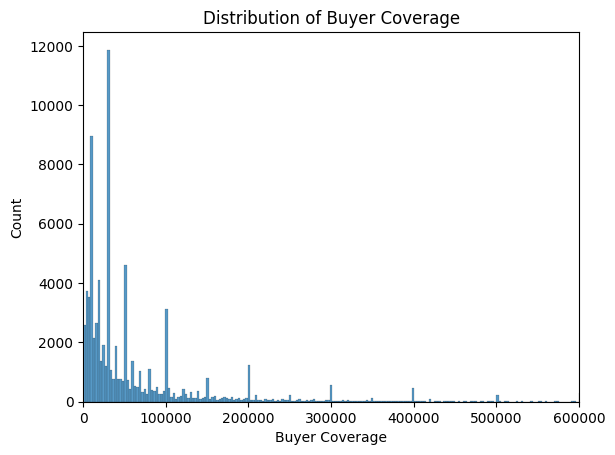

In [1261]:
sns.histplot(buyer, x='coverage_buyer').set(xlabel='Buyer Coverage', title='Distribution of Buyer Coverage', xlim=(0,600000))
plt.show()
#Distribution of coverage amount

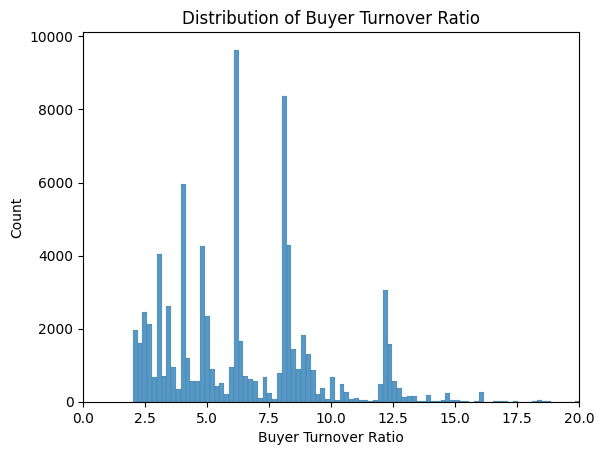

In [1262]:
sns.histplot(buyer, x='turnover_ratio_buyer').set(xlabel='Buyer Turnover Ratio', title='Distribution of Buyer Turnover Ratio', xlim=(0,20))
plt.show()
#Distribution of the original buyer turnover ratio

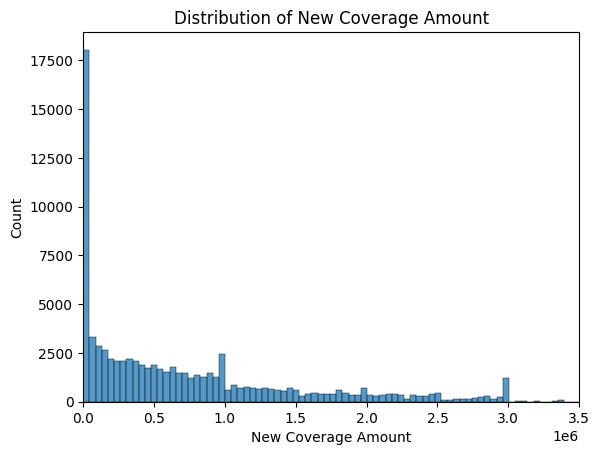

In [1263]:
sns.histplot(buyer, x='new_coverage_policy').set(xlabel='New Coverage Amount', title='Distribution of New Coverage Amount', xlim=(0,3500000))
plt.show()
#Distribution of our new coverage amount

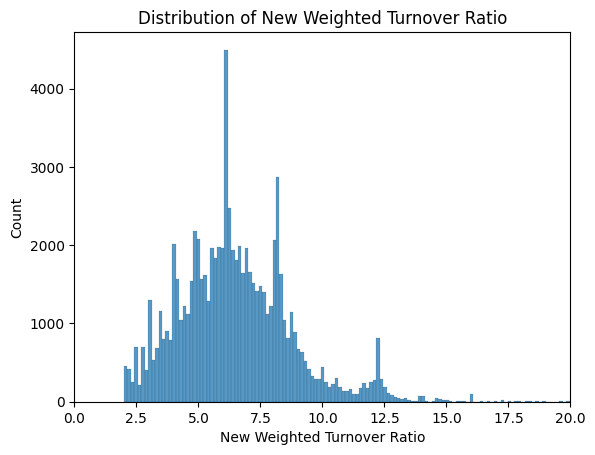

In [1264]:
sns.histplot(buyer, x='new_trb_policy').set(xlabel='New Weighted Turnover Ratio', title='Distribution of New Weighted Turnover Ratio', xlim=(0,20))
plt.show()
#Distribution of our new weighted Turnover Ratio

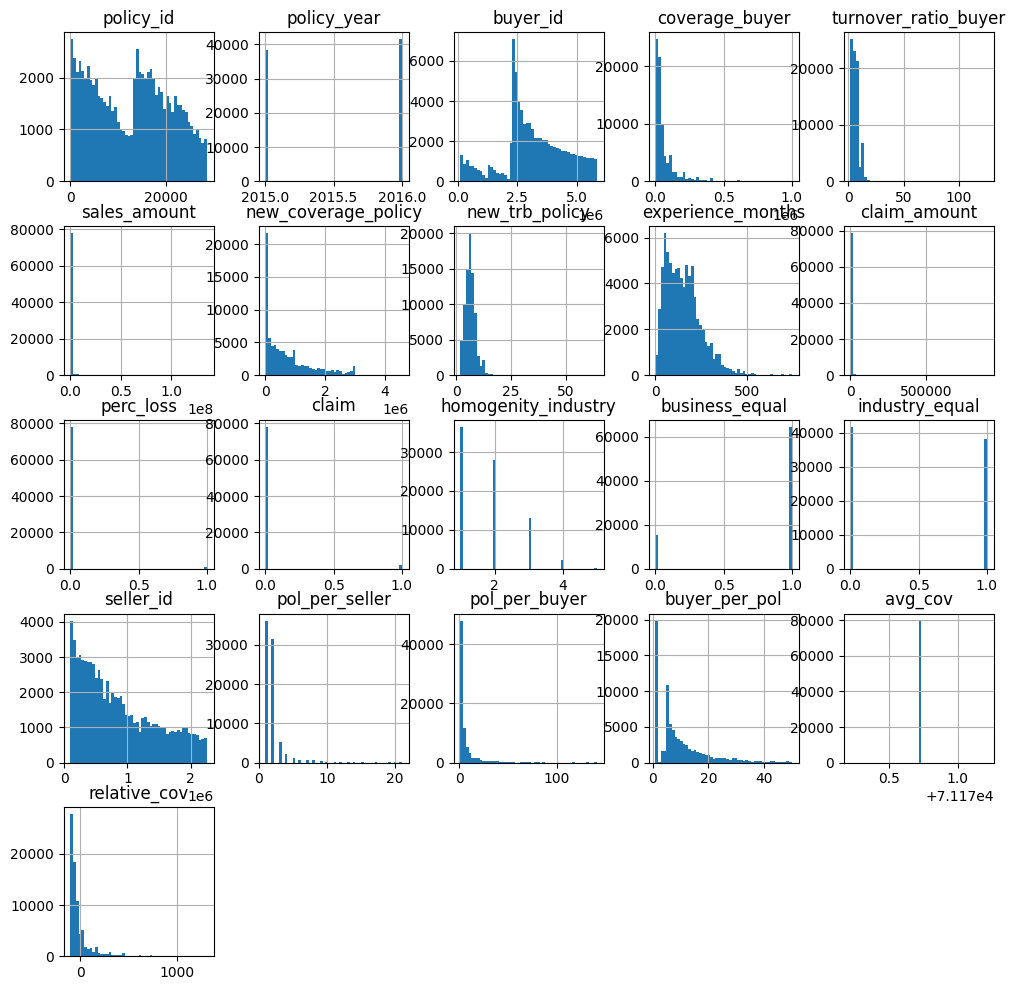

In [1265]:
buyer.hist(bins=50, figsize=(12,12))
plt.show()
#Distribution of all variables

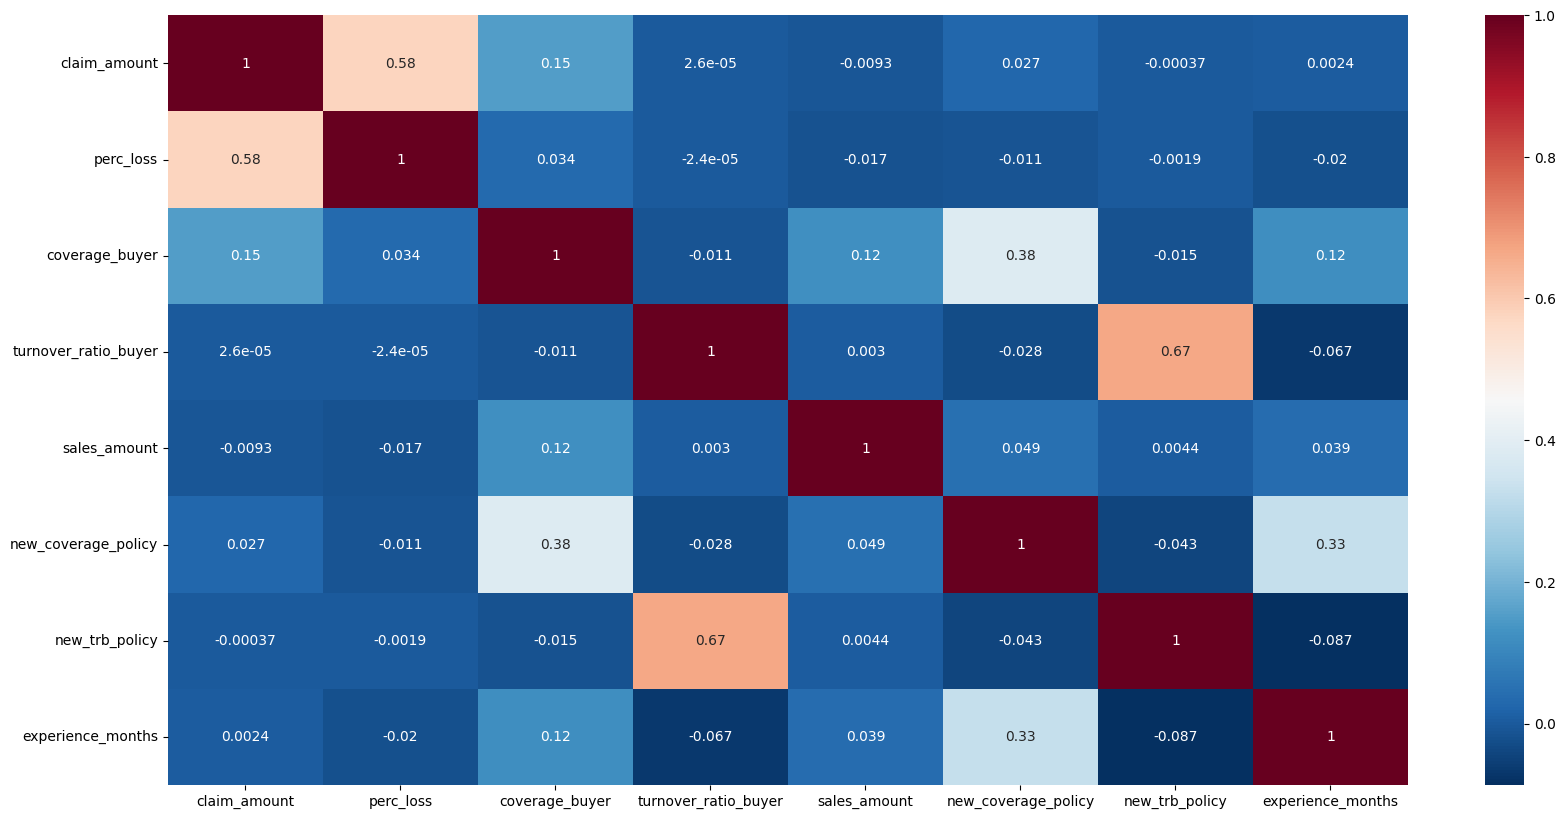

In [1266]:
bdcor = buyer[['claim_amount','perc_loss','coverage_buyer','turnover_ratio_buyer','sales_amount','business_type_buyer','industry_buyer','new_coverage_policy','new_trb_policy','experience_months']]

fig, axes = plt.subplots(figsize=(20,10))
sns.heatmap(bdcor.corr(numeric_only=True), annot=True, cmap='RdBu_r')
plt.show()

# Predictive Modeling

No clear linear regression between variables; hence, a nonlinear model was necessary as random forest


In [1267]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [1268]:
# Convert categorical variables to dummy variables, dropping the first option,
# and create a DataFrame for categorical variables.

oneHotColums = ['policy_type','business_type_buyer', 'industry_buyer', 'business_type_seller',
                'industry_seller']
df_oneHot = pd.DataFrame()

for i in oneHotColums:
    cat_encoder = OneHotEncoder(drop='first')
    hot = cat_encoder.fit_transform(buyer[[i]])
    colums = cat_encoder.categories_[0][1:]
    stripped_colums = [str(item) for item in colums]
    stripped_colums = [item.replace(" ", "_") for item in stripped_colums]
    stripped_colums = [item.replace(",", "") for item in stripped_colums]
    stripped_colums = [item.replace("and", "") for item in stripped_colums]
    if i == 'business_type_buyer':
        stripped_colums = [item + "_buyer" for item in stripped_colums]
    if i == 'industry_buyer':
        stripped_colums = [item + "_buyer" for item in stripped_colums]
    aux_df = pd.DataFrame(hot.toarray())
    aux_df.columns = stripped_colums
    df_oneHot = pd.concat([df_oneHot, aux_df], axis=1)

df_oneHot = pd.concat([df_oneHot, buyer[['business_equal']]], axis=1)
df_oneHot = df_oneHot.astype(int)
df_oneHot.head()

,One_buyer,Individual_Business_buyer,Construction_buyer,Finance__Insurance_buyer,Manufacturing_buyer,Other_Services_buyer,Professional_Scientific__Technical_Services_buyer,Transportation_buyer,Utilities_buyer,Wholesale_Trade_buyer,Individual_Business,Construction,Manufacturing,Other_Services,Professional_Scientific__Technical_Services,Transportation,Utilities,Wholesale_Trade,business_equal
0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [1269]:
# Convert continuous variables to standard scale and create a DataFrame for these variables

StandardScaler_colums = ['claim_amount', 'policy_year', 'coverage_buyer', 'turnover_ratio_buyer', 'sales_amount',
                         'new_coverage_policy', 'new_trb_policy', 'experience_months','homogenity_industry']

num_scaler = StandardScaler()
df_StandardScaler = num_scaler.fit_transform(buyer[StandardScaler_colums])
df_StandardScaler = pd.DataFrame(df_StandardScaler)
df_StandardScaler.columns = StandardScaler_colums
df_StandardScaler

,claim_amount,policy_year,coverage_buyer,turnover_ratio_buyer,sales_amount,new_coverage_policy,new_trb_policy,experience_months,homogenity_industry
0,-0.081,-1.038,-0.529,-1.326,-0.128,-0.897,-1.819,0.022,-0.919
1,-0.081,-1.038,-0.529,-0.729,-0.128,-0.897,-1.000,-0.801,-0.919
2,-0.081,0.964,-0.521,-0.702,-0.128,-0.465,-1.142,1.070,-0.919
3,-0.081,0.964,-0.529,3.496,-0.128,-0.897,4.796,-0.646,-0.919
4,-0.081,0.964,0.509,-0.491,-0.085,2.269,-0.804,0.659,2.650
...,...,...,...,...,...,...,...,...,...
79883,-0.081,0.964,-0.356,-0.126,-0.130,-0.852,-0.172,-0.770,0.271
79884,-0.081,0.964,-0.573,-0.126,-0.131,-0.852,-0.172,-0.770,0.271
79885,0.647,0.964,-0.356,-0.126,-0.127,-0.871,-0.172,-0.585,-0.919
79886,-0.081,0.964,-0.356,-0.123,-0.127,-0.871,-0.168,-0.359,-0.919


In [1270]:
# Join categorical and scale DataFrames
yX = pd.concat([df_StandardScaler, df_oneHot], axis=1)

# Create y and X DataFrames
y_total = yX['claim_amount']
X_total = yX[yX.columns[yX.columns != 'claim_amount']]

Cross-validation was utilized to test the model, preventing overfitting effectively, 

In [1271]:
# Create GridSearchCV for RandomForestRegressor to select the best model

param_grid = [
    {'n_estimators': [3, 10, 20, 30], 'max_features': [5, 10, 15], 'max_depth': [None, 3, 5, 7]}
  ]

forest_reg = RandomForestRegressor(random_state=123)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_total, y_total)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
             param_grid=[{'max_depth': [None, 3, 5, 7],
                          'max_features': [5, 10, 15],
                          'n_estimators': [3, 10, 20, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [1277]:
# The best model for the GridSearchCV
grid_search.best_params_

{'max_depth': 5, 'max_features': 10, 'n_estimators': 20}

In [1278]:
# Create a DataFrame with mean score for each parameters 

cvres = grid_search.cv_results_
result_df = pd.DataFrame([])
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    result_df = pd.concat([result_df, pd.DataFrame({'mean_score': [np.sqrt(-mean_score)],
                                                    'max_depth': [params['max_depth']],
                                                    'max_features': [params['max_features']],
                                                    'n_estimators': [params['n_estimators']],})])
    #print(np.sqrt(-mean_score), params)
result_df['max_depth'] = result_df['max_depth'].fillna("None")
result_df.head()


,mean_score,max_depth,max_features,n_estimators
0,1.141,None,5,3
0,1.038,None,5,10
0,1.017,None,5,20
0,1.014,None,5,30
0,1.134,None,10,3


In [1279]:
# Split DataFrame with mean score for each parameters by max features 

max5 = result_df.loc[result_df['max_features'] == 5, :]
max10 = result_df.loc[result_df['max_features'] == 10, :]
max15 = result_df.loc[result_df['max_features'] == 15, :]

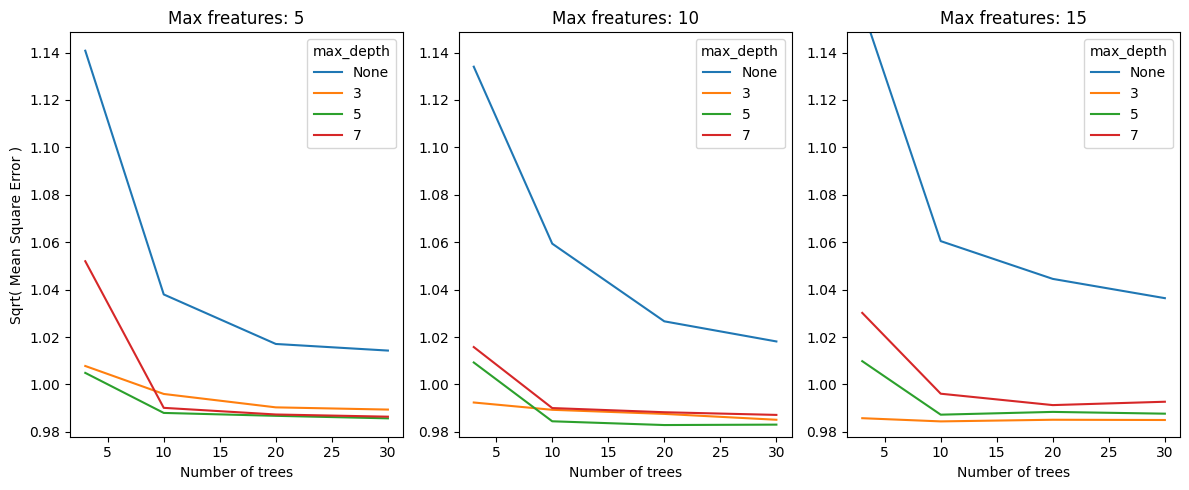

In [1280]:
# Plot to select the best model
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

sns.lineplot(data=max5, x="n_estimators", y="mean_score", hue="max_depth", ax=axes[0])
axes[0].set_title("Max freatures: 5")
axes[0].set_xlabel("Number of trees")
axes[0].set_ylabel("Sqrt( Mean Square Error )")

sns.lineplot(data=max10, x="n_estimators", y="mean_score", hue="max_depth", ax=axes[1])
axes[1].set_title("Max freatures: 10")
axes[1].set_xlabel("Number of trees")
axes[1].set_ylabel("")

sns.lineplot(data=max15, x="n_estimators", y="mean_score", hue="max_depth", ax=axes[2])
axes[2].set_title("Max freatures: 15")
axes[2].set_xlabel("Number of trees")
axes[2].set_ylabel("")

ylim = axes[0].get_ylim()
axes[1].set_ylim(ylim)
axes[2].set_ylim(ylim)

plt.tight_layout()
plt.show()


<Axes: xlabel='importance(%)', ylabel='feature'>

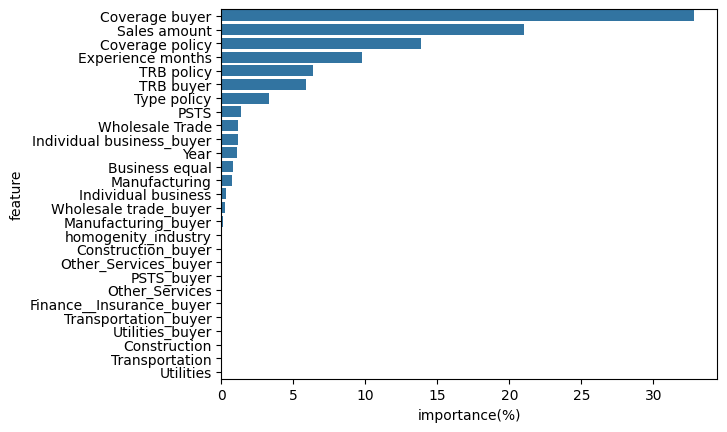

In [1281]:
# Plot to understand the most important features for the model

feature_importances = pd.DataFrame(grid_search.best_estimator_.feature_importances_)
feature_importances['feature'] = X_total.columns 
feature_importances.columns = ['importance(%)', 'feature']
feature_importances['importance(%)'] =  feature_importances['importance(%)'] * 100
feature_importances = feature_importances.sort_values(by='importance(%)', ascending=False)

feature_importances['feature'].replace({'coverage_buyer': 'Coverage buyer',
                                    'sales_amount': 'Sales amount',
                                    'new_coverage_policy': 'Coverage policy',
                                    'experience_months': 'Experience months',
                                    'new_trb_policy': 'TRB policy',
                                    'turnover_ratio_buyer': 'TRB buyer',
                                    'One_buyer': 'Type policy',
                                    'Professional_Scientific__Technical_Services': 'PSTS',
                                    'Wholesale_Trade': 'Wholesale Trade',
                                    'Individual_Business_buyer': 'Individual business_buyer',
                                    'policy_year': 'Year',
                                    'business_equal': 'Business equal',
                                    'Individual_Business': 'Individual business',
                                    'Wholesale_Trade_buyer': 'Wholesale trade_buyer',
                                    'Professional_Scientific__Technical_Services_buyer': 'PSTS_buyer'}, inplace=True)

sns.barplot(feature_importances, x="importance(%)", y="feature", orient='y')


In [1283]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.1407938001721991 {'max_depth': None, 'max_features': 5, 'n_estimators': 3}
1.0379638420933617 {'max_depth': None, 'max_features': 5, 'n_estimators': 10}
1.0170675986194277 {'max_depth': None, 'max_features': 5, 'n_estimators': 20}
1.0142815024573542 {'max_depth': None, 'max_features': 5, 'n_estimators': 30}
1.134053884289465 {'max_depth': None, 'max_features': 10, 'n_estimators': 3}
1.0593942467146715 {'max_depth': None, 'max_features': 10, 'n_estimators': 10}
1.026621592878919 {'max_depth': None, 'max_features': 10, 'n_estimators': 20}
1.0181312401123503 {'max_depth': None, 'max_features': 10, 'n_estimators': 30}
1.1587474592750988 {'max_depth': None, 'max_features': 15, 'n_estimators': 3}
1.0604648933908685 {'max_depth': None, 'max_features': 15, 'n_estimators': 10}
1.044524465685249 {'max_depth': None, 'max_features': 15, 'n_estimators': 20}
1.0363939303575744 {'max_depth': None, 'max_features': 15, 'n_estimators': 30}
1.0077752266455142 {'max_depth': 3, 'max_features': 5, 'n_esti